# Airline Passenger Satisfaction Machine Learning Project


# Problem Analysis

## Problem Statememnt
- Following the pandemic, the airline industry suffered a massive setback, with ICAO estimating a 371 billion dollar loss in 2020, and a 329 billion dollar loss with reduced seat capacity. As a result, in order to revitalise the industry in the face of the current recession, it is absolutely necessary to understand the customer pain points and improve their satisfaction with the services provided.

- This data set contains a survey on air passenger satisfaction survey.Need to predict Airline passenger satisfaction level:1.Satisfaction 2.Neutral or dissatisfied.

- Select the best predictive models for predicting passengers satisfaction.

## Key Observations
- This is a binary classification problem,it is necessary to predict which of the two levels of satisfaction with the airline the passenger belongs to:Satisfaction, Neutral or dissatisfied

- Before diving into the data, thinking intuitively and being an avid traveller myself, from my experience, the main factors should be:

1. Delays in the flight

2. Staff efficiency to address customer needs

3. Services provided in the flight

# Data Gathering and Initial Insights

## Installing and Importing the required packages

In [12]:
## Data Analysis packages
import numpy as np
import pandas as pd

## Data Visualization packages
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import matplotlib
%matplotlib inline
from pylab import rcParams
import missingno as msno

## General Tools
import os
import re
import joblib
import json
import warnings


# sklearn library
import sklearn

### sklearn preprocessing tools
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer 
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import StratifiedKFold,train_test_split
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,auc,accuracy_score,roc_auc_score
from sklearn.preprocessing import StandardScaler, RobustScaler, QuantileTransformer, PowerTransformer,FunctionTransformer,OneHotEncoder


# Error Metrics 
from sklearn.metrics import r2_score #r2 square
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score,recall_score,f1_score


### Machine learning classification Models
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier #stacstic gradient descent clasifeier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.naive_bayes import GaussianNB
import lightgbm as lgb
from sklearn.ensemble import AdaBoostClassifier


#crossvalidation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut
#from sklearn.metrics import plot_confusion_matrix


#hyper parameter tunning
from sklearn.model_selection import GridSearchCV,cross_val_score,RandomizedSearchCV

## Downloading the dataset

- The dataset is from Kaggle. it provides cutting-edge data science, faster and better than most people ever thought possible. Kaggle offers both public and private data science competitions and on-demand consulting by an elite global talent pool.
- When you execute od.download, you will be asked to provide your Kaggle username and API key. Follow these instructions to create an API key: http://bit.ly/kaggle-creds
- Dataset link https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction

## Information about the dataset


There is the following information about the passengers of some airline:

1. **Gender:** male or female
2. **Customer type:** regular or non-regular airline customer
3. **Age**: the actual age of the passenger
4. **Type of travel:** the purpose of the passenger's flight (personal or business travel)
5. **Class:** business, economy, economy plus
6. **Flight distance**
7. **Inflight wifi service:** satisfaction level with Wi-Fi service on board (0: not rated; 1-5)
8. **Departure/Arrival time convenient:** departure/arrival time satisfaction level (0: not rated; 1-5)
9. **Ease of Online booking:** online booking satisfaction rate (0: not rated; 1-5)
10. **Gate location:** level of satisfaction with the gate location (0: not rated; 1-5)
11. **Food and drink:** food and drink satisfaction level (0: not rated; 1-5)
12. **Online boarding:** satisfaction level with online boarding (0: not rated; 1-5)
13. **Seat comfort:** seat satisfaction level (0: not rated; 1-5)
14. Inflight entertainment: satisfaction with inflight entertainment (0: not rated; 1-5)
15. **On-board service:** level of satisfaction with on-board service (0: not rated; 1-5)
16. **Leg room service:** level of satisfaction with leg room service (0: not rated; 1-5)
17. **Baggage handling:** level of satisfaction with baggage handling (0: not rated; 1-5)
18. **Checkin service:** level of satisfaction with checkin service (0: not rated; 1-5)
19. **Inflight service:** level of satisfaction with inflight service (0: not rated; 1-5)
20. **Cleanliness:** level of satisfaction with cleanliness (0: not rated; 1-5)
21. **Departure delay in minutes:**
22. **Arrival delay in minutes:**
23. **Satisfaction:** Airline satisfaction level(Satisfaction, neutral or dissatisfaction).

**Train Dataset**

In [35]:
train_df = pd.read_csv("./data/train.csv")
train_df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [36]:
## Initial Statistical description

train_df.describe()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,51951.500000,64924.210502,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,29994.645522,37463.812252,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,0.000000,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25975.750000,32533.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,51951.500000,64856.500000,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,77927.250000,97368.250000,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,103903.000000,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


**Observations**
- The average delay in flights are 15 minutes, with a deviation of 38
- Median of the delays are 0, which means 50% of the flights from this data, were not delayed

In [37]:
## removing the first two columns
train_df.drop(["Unnamed: 0", 'id'], axis=1, inplace=True)

In [38]:
train_df.head(2)

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied


In [39]:
## shape of the train dataset
train_df.shape

(103904, 23)

In [40]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103904 non-null  object 
 1   Customer Type                      103904 non-null  object 
 2   Age                                103904 non-null  int64  
 3   Type of Travel                     103904 non-null  object 
 4   Class                              103904 non-null  object 
 5   Flight Distance                    103904 non-null  int64  
 6   Inflight wifi service              103904 non-null  int64  
 7   Departure/Arrival time convenient  103904 non-null  int64  
 8   Ease of Online booking             103904 non-null  int64  
 9   Gate location                      103904 non-null  int64  
 10  Food and drink                     103904 non-null  int64  
 11  Online boarding                    1039

- Only Arrival Delay in Minutes has null values. Lets visualize to see any patterns in the missing values

In [41]:
#pip install missingno

<Axes: >

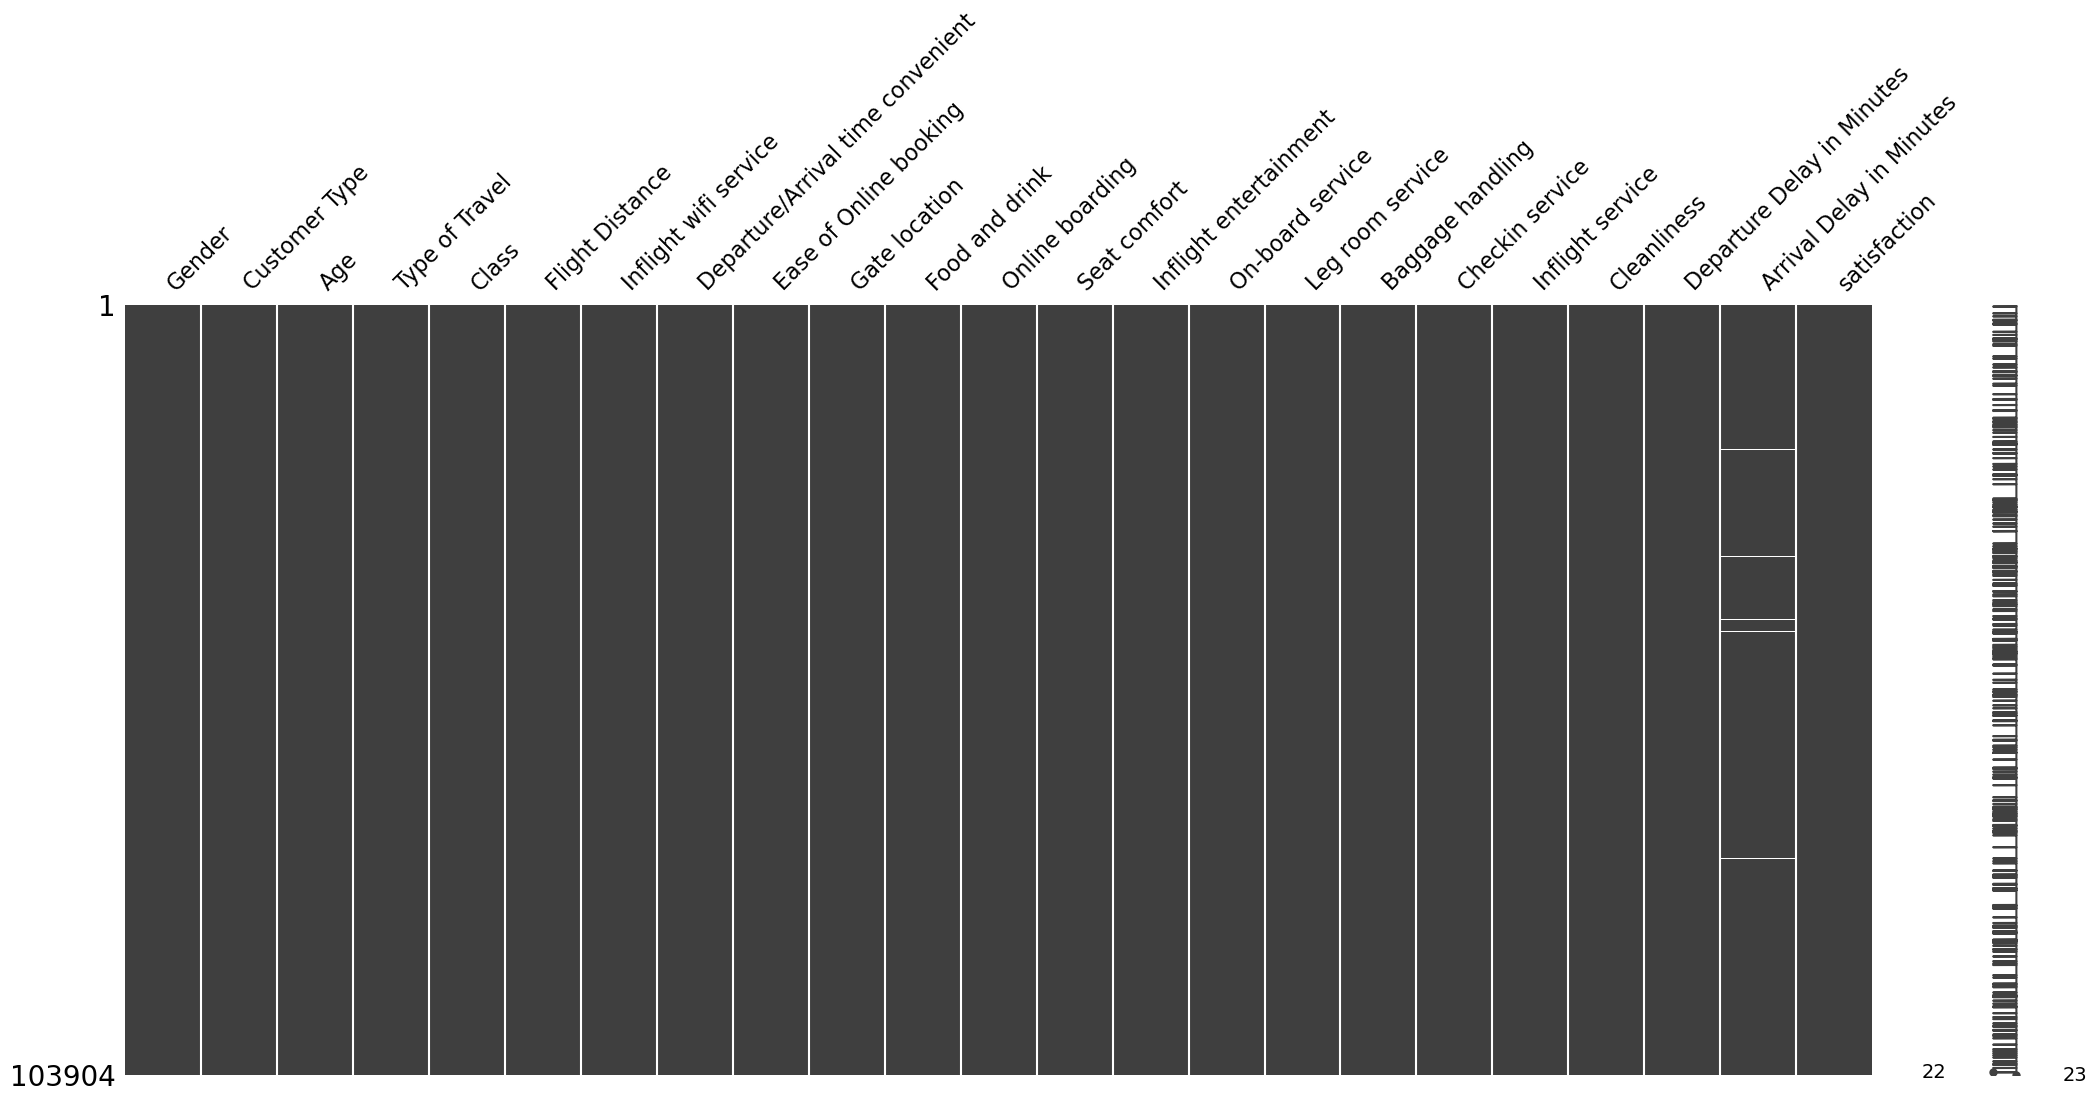

In [42]:
msno.matrix(train_df)

**Observations**
- There are 103904 rows for 23 features in our data
- we see in the training data, that all the datatypes belongs to a numeric class that is int, float and object
- only arrival delay in minutes have some null values

In [43]:
# percentage of null values

train_df.isnull().sum()

Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64

- The number of null values is 310 in "Arrival Delay in Minutes" column
- The percentage of null values is ~ 0.3%

In [44]:
round(train_df.describe().T, 2)

,count,mean,std,min,25%,50%,75%,max
Age,103904.0,39.38,15.11,7.0,27.0,40.0,51.0,85.0
Flight Distance,103904.0,1189.45,997.15,31.0,414.0,843.0,1743.0,4983.0
Inflight wifi service,103904.0,2.73,1.33,0.0,2.0,3.0,4.0,5.0
Departure/Arrival time convenient,103904.0,3.06,1.53,0.0,2.0,3.0,4.0,5.0
Ease of Online booking,103904.0,2.76,1.40,0.0,2.0,3.0,4.0,5.0
Gate location,103904.0,2.98,1.28,0.0,2.0,3.0,4.0,5.0
Food and drink,103904.0,3.20,1.33,0.0,2.0,3.0,4.0,5.0
Online boarding,103904.0,3.25,1.35,0.0,2.0,3.0,4.0,5.0
Seat comfort,103904.0,3.44,1.32,0.0,2.0,4.0,5.0,5.0
Inflight entertainment,103904.0,3.36,1.33,0.0,2.0,4.0,4.0,5.0


In [45]:
# Duplicate values
train_df.duplicated().sum()

0

In [46]:
# target variable
train_df.satisfaction.value_counts()[1]/len(train_df.satisfaction)*100

43.333269171542966

 - This problem is a binary classification problem of classes 0 or 1 denoting customer satisfaction, The class 1 has 43.33% of total values. Hence, this is a balanced learning problem. hence will not be requiring any resampling techniques to tackle this

## Independent Variables or features**

In [47]:
train_df.columns[:-1]

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes',
       'Arrival Delay in Minutes'],
      dtype='object')

# Exploratory Data Analysis and Visualization

Before training a machine learning model, its always a good idea to explore the distributions of various columns and see how they are related to the target column. Let's explore and visualize the data using the Plotly, Matplotlib and Seaborn libraries. 

In [48]:
train_df.corr(numeric_only= True)

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
Age,1.000000,0.099461,0.017859,0.038125,0.024842,-0.001330,0.023000,0.208939,0.160277,0.076444,0.057594,0.040583,-0.047529,0.035482,-0.049427,0.053611,-0.010152,-0.012147
Flight Distance,0.099461,1.000000,0.007131,-0.020043,0.065717,0.004793,0.056994,0.214869,0.157333,0.128740,0.109526,0.133916,0.063184,0.073072,0.057540,0.093149,0.002158,-0.002426
Inflight wifi service,0.017859,0.007131,1.000000,0.343845,0.715856,0.336248,0.134718,0.456970,0.122658,0.209321,0.121500,0.160473,0.120923,0.043193,0.110441,0.132698,-0.017402,-0.019095
Departure/Arrival time convenient,0.038125,-0.020043,0.343845,1.000000,0.436961,0.444757,0.004906,0.070119,0.011344,-0.004861,0.068882,0.012441,0.072126,0.093333,0.073318,0.014292,0.001005,-0.000864
Ease of Online booking,0.024842,0.065717,0.715856,0.436961,1.000000,0.458655,0.031873,0.404074,0.030014,0.047032,0.038833,0.107601,0.038762,0.011081,0.035272,0.016179,-0.006371,-0.007984
Gate location,-0.001330,0.004793,0.336248,0.444757,0.458655,1.000000,-0.001159,0.001688,0.003669,0.003517,-0.028373,-0.005873,0.002313,-0.035427,0.001681,-0.003830,0.005467,0.005143
Food and drink,0.023000,0.056994,0.134718,0.004906,0.031873,-0.001159,1.000000,0.234468,0.574556,0.622512,0.059073,0.032498,0.034746,0.087299,0.033993,0.657760,-0.029926,-0.032524
Online boarding,0.208939,0.214869,0.456970,0.070119,0.404074,0.001688,0.234468,1.000000,0.420211,0.285066,0.155443,0.123950,0.083280,0.204462,0.074573,0.331517,-0.018982,-0.021949
Seat comfort,0.160277,0.157333,0.122658,0.011344,0.030014,0.003669,0.574556,0.420211,1.000000,0.610590,0.131971,0.105559,0.074542,0.191854,0.069218,0.678534,-0.027898,-0.029900
Inflight entertainment,0.076444,0.128740,0.209321,-0.004861,0.047032,0.003517,0.622512,0.285066,0.610590,1.000000,0.420153,0.299692,0.378210,0.120867,0.404855,0.691815,-0.027489,-0.030703


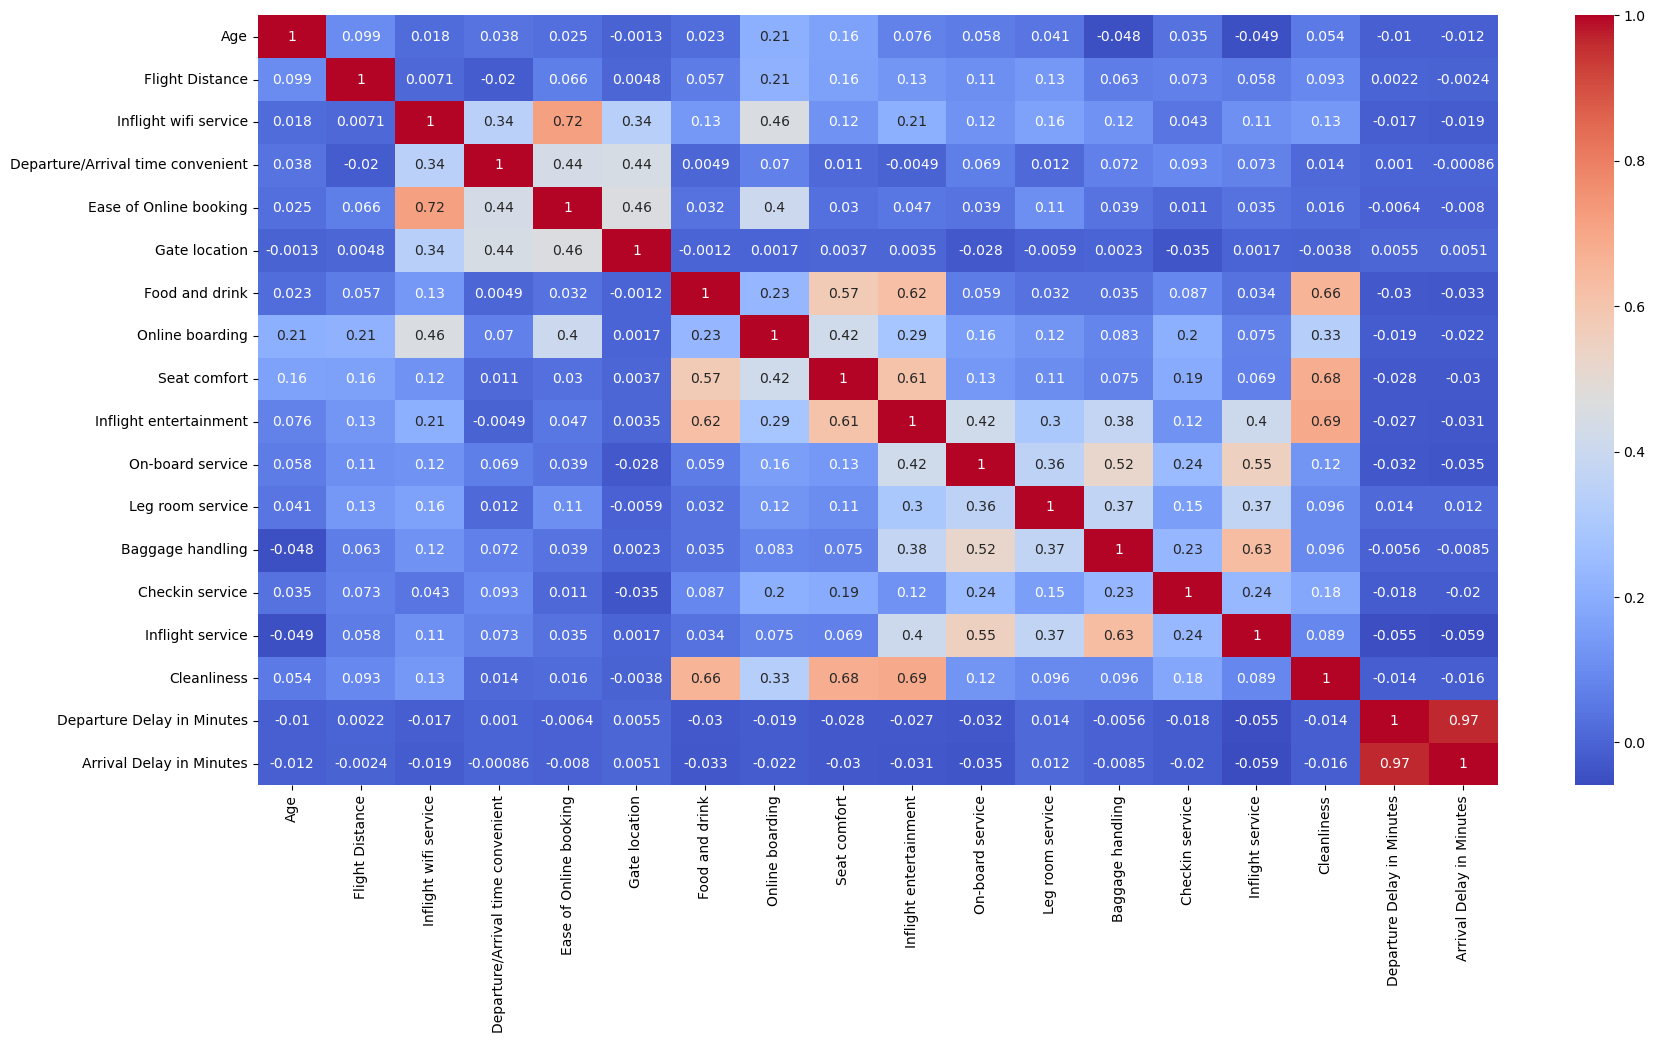

In [49]:
plt.figure(figsize=(20, 10))
sns.heatmap(train_df.corr(numeric_only= True), annot=True, vmax=1, cmap='coolwarm')
plt.show()

- departure delay in minutes and arrival dalay in minutes are highly co-related!

## Data distribution graphs

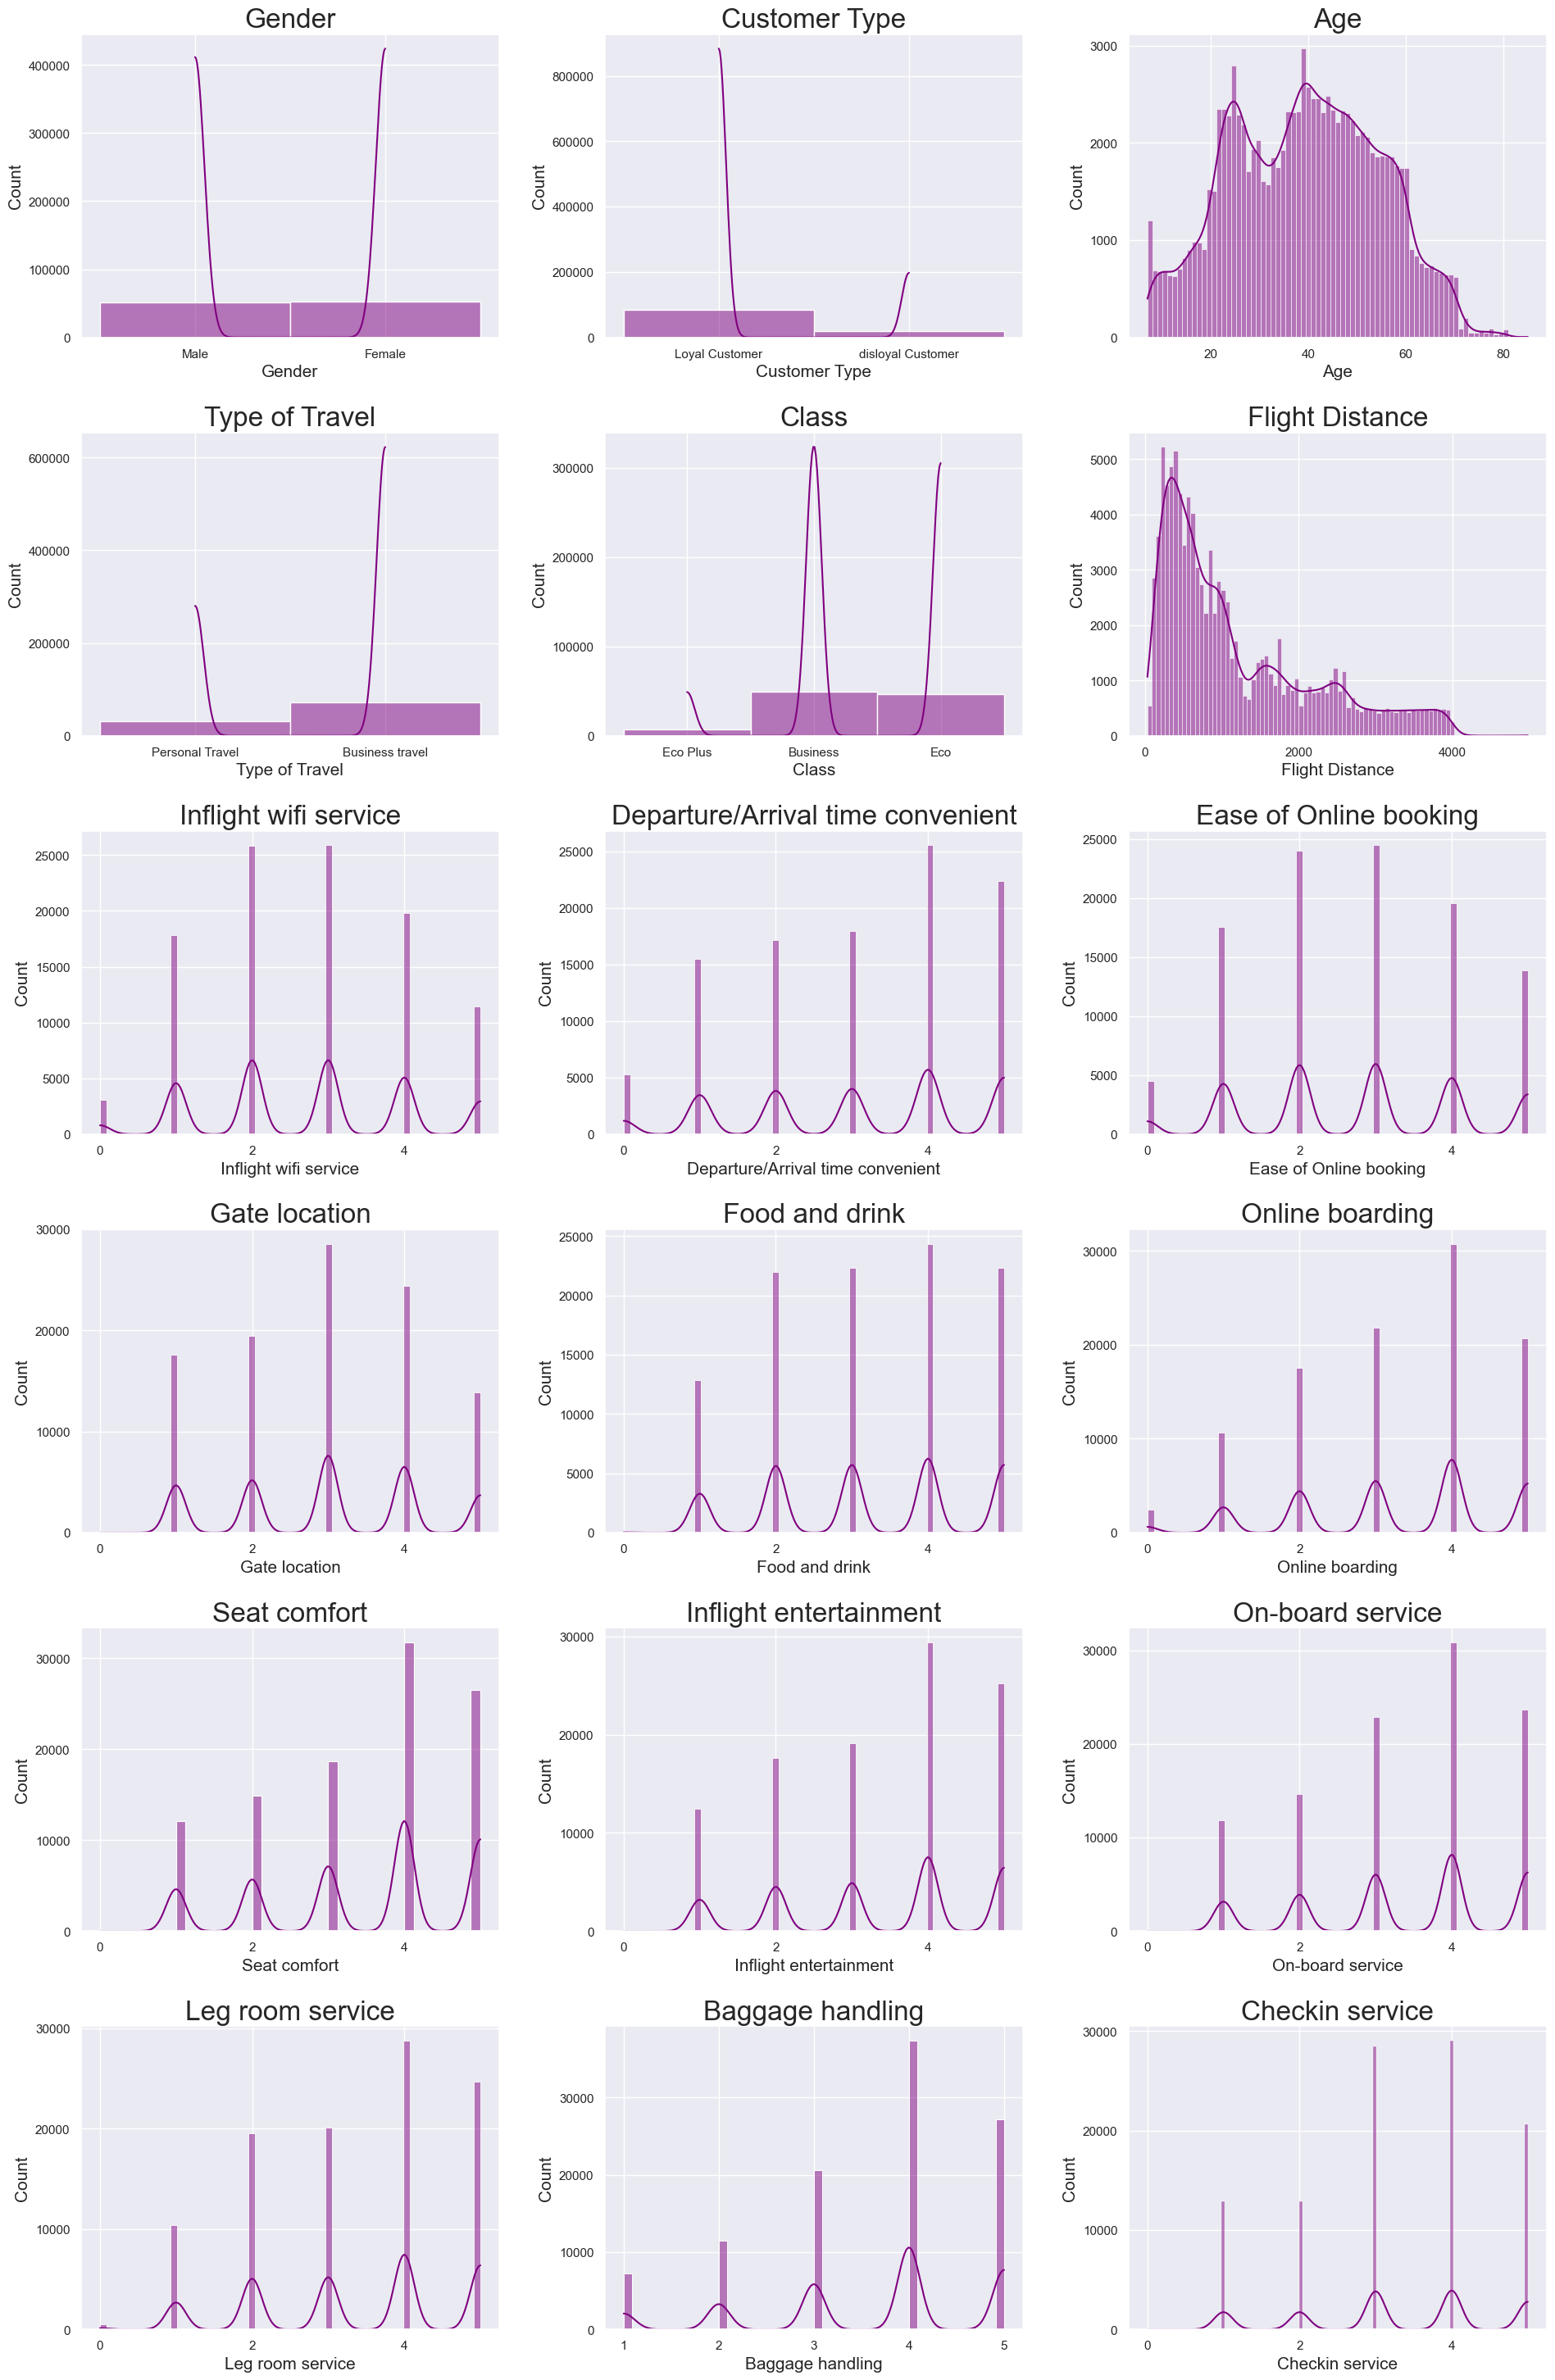

In [50]:
sns.set(rc={
    "font.size":15,
    "axes.titlesize":10,
    "axes.labelsize":15},
    style="darkgrid")
fig, axs = plt.subplots(6, 3, figsize=(20,30))
fig.tight_layout(pad=4.0)

for f, ax in zip(train_df, axs.ravel()):
    sns.set(font_scale = 2)
    ax = sns.histplot(ax=ax, data=train_df, x=train_df[f], kde=True, color='purple')
    ax.set_title(f)

## Piechart perrcentage distribution features

In [51]:
new_train_df = train_df.copy()

In [52]:
new_train_df.drop(['Age','Flight Distance','Departure Delay in Minutes', 'Arrival Delay in Minutes','satisfaction'], axis=1, inplace=True)

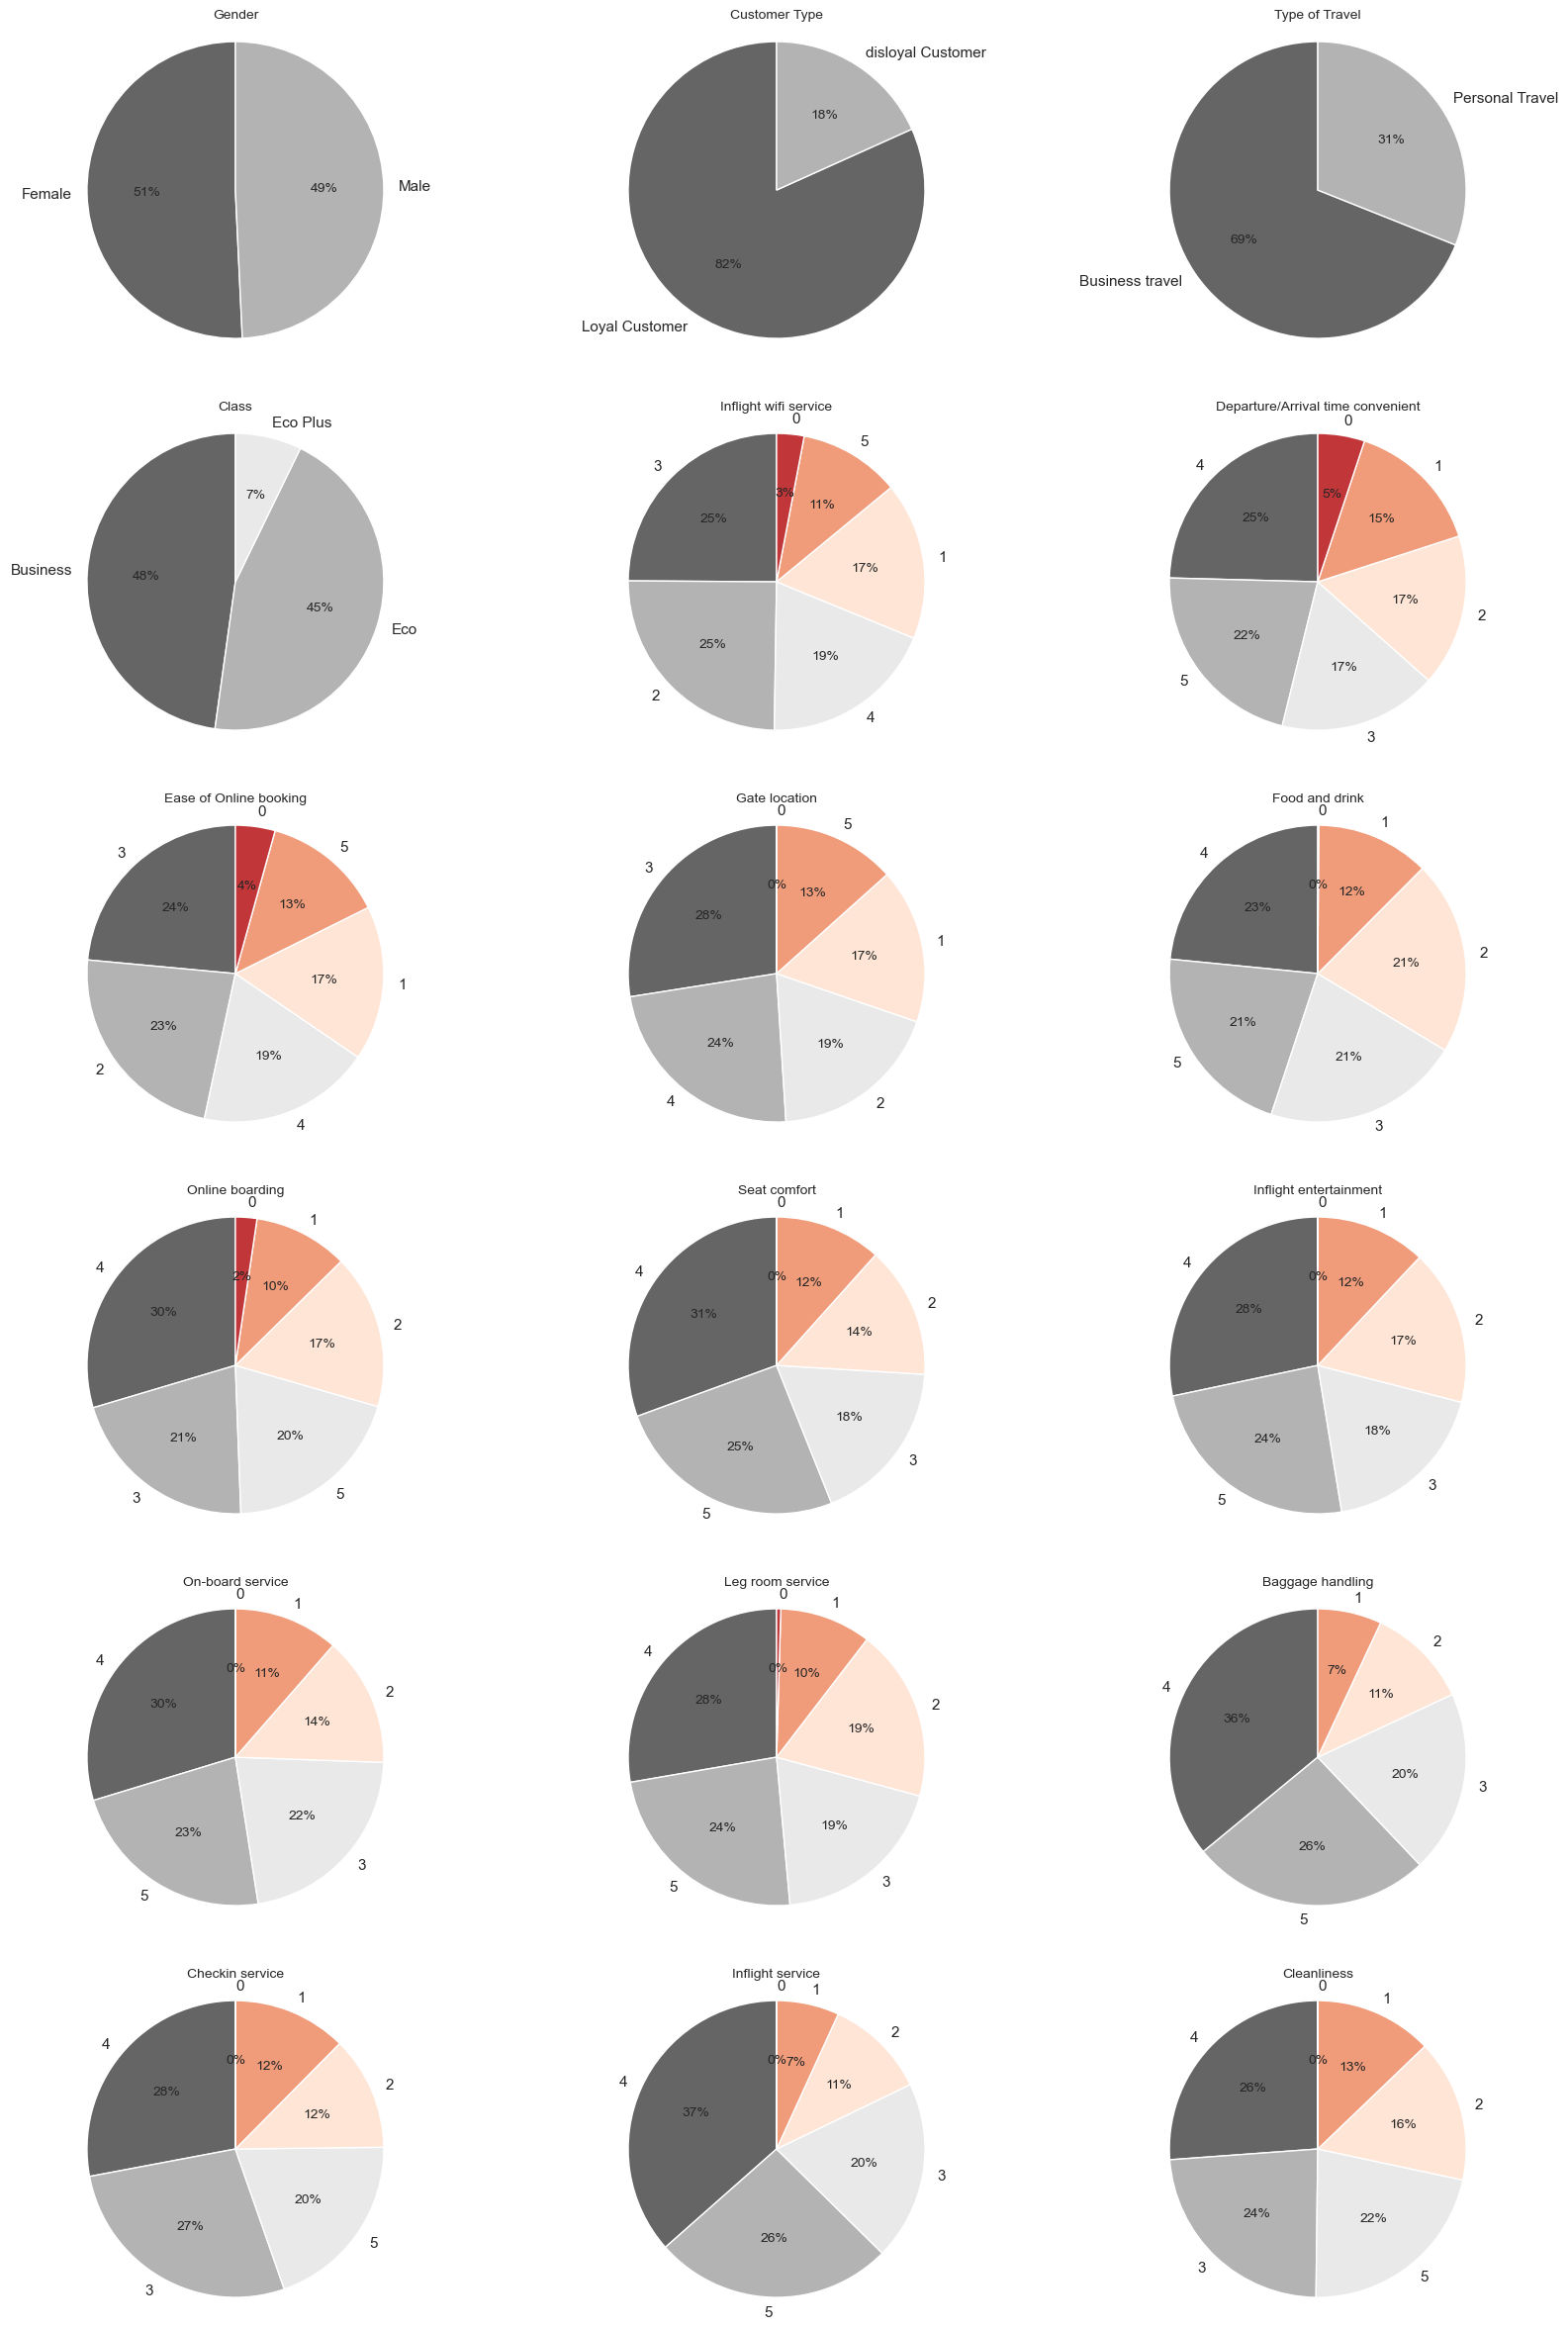

In [53]:
sns.set(rc={
            "font.size":10,
            "axes.titlesize":10,
            "axes.labelsize":13},
             style="darkgrid")
fig, axes = plt.subplots(6, 3, figsize = (20, 30))
for i, col in enumerate(new_train_df):
    column_values = new_train_df[col].value_counts()
    labels = column_values.index
    sizes = column_values.values
    axes[i//3, i%3].pie(sizes,labels = labels, colors = sns.color_palette("RdGy_r"),autopct = '%1.0f%%', startangle = 90)
    axes[i//3, i%3].axis('equal')
    axes[i//3, i%3].set_title(col)
plt.show()

**Observations:**
- The number of men and women in this sample is approximately the same
- The vast majority of the airline's customers are repeat customers
- Most of the clients flew for business rather than personal reasons
- About half of the passengers were in business class
- More than 60% of passengers were satisfied with the luggage transportation service(rated 4-5 out of 5)
- More than 50% of pessengers were compfortable sitting in thier seats(rated 4-5 out of 5)

In [54]:
## Satisfaction

In [55]:
train_df.satisfaction.value_counts()

neutral or dissatisfied    58879
satisfied                  45025
Name: satisfaction, dtype: int64

Text(0.5, 1.0, 'Distribution of Satisfaction')

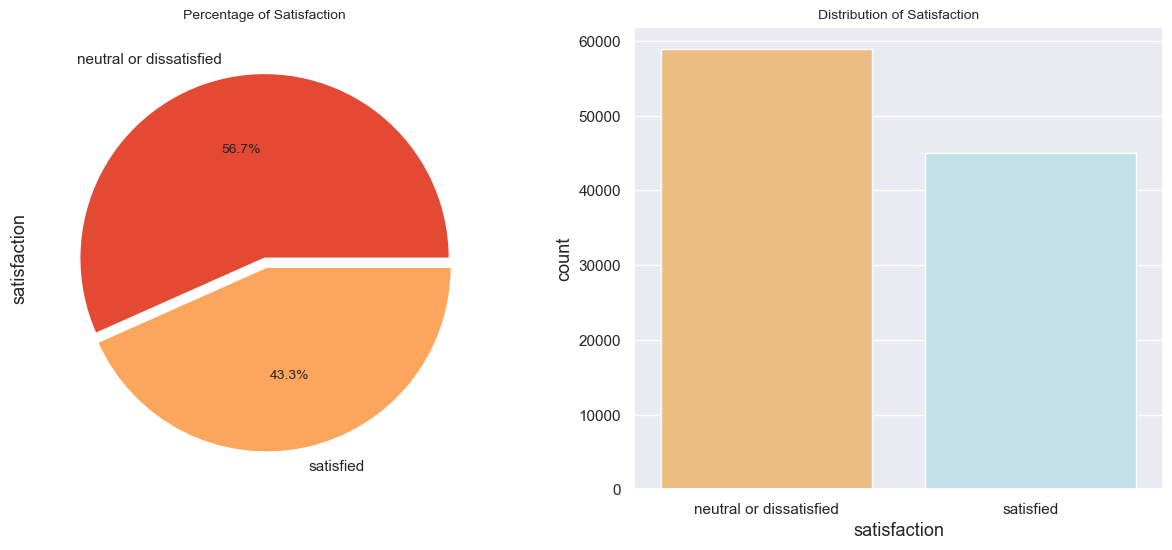

In [56]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15,6))
train_df.satisfaction.value_counts().plot.pie(explode=(0, 0.05), colors=sns.color_palette("RdYlBu"),autopct='%1.1f%%',ax=ax1)
ax1.set_title("Percentage of Satisfaction")
sns.countplot(x= "satisfaction", data=train_df, ax=ax2, palette='RdYlBu')
ax2.set_title("Distribution of Satisfaction")


**Observation:**
- As per the given data, 56.7% people are dissatisfied and neutral
- And 43.3 people are satisfied


To analyse and visualise the data lets divide data columns into categorical and numerical columns.

In [57]:
# numerical and categorical features
numerical_cols = train_df.select_dtypes(include=np.number).columns.to_list()
categorical_cols = train_df.select_dtypes('object').columns.to_list()

In [58]:
#numerical columns
print("Total number of columns are:",len(numerical_cols))
print(numerical_cols)

Total number of columns are: 18
['Age', 'Flight Distance', 'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']


In [59]:
#Categorical Columns
print("Total number of columns are:",len(categorical_cols))
print(categorical_cols)

Total number of columns are: 5
['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction']


In [60]:
categorical_cols.remove('satisfaction')

# Exploratory Data Analysis and Visualization on Numerical Columns

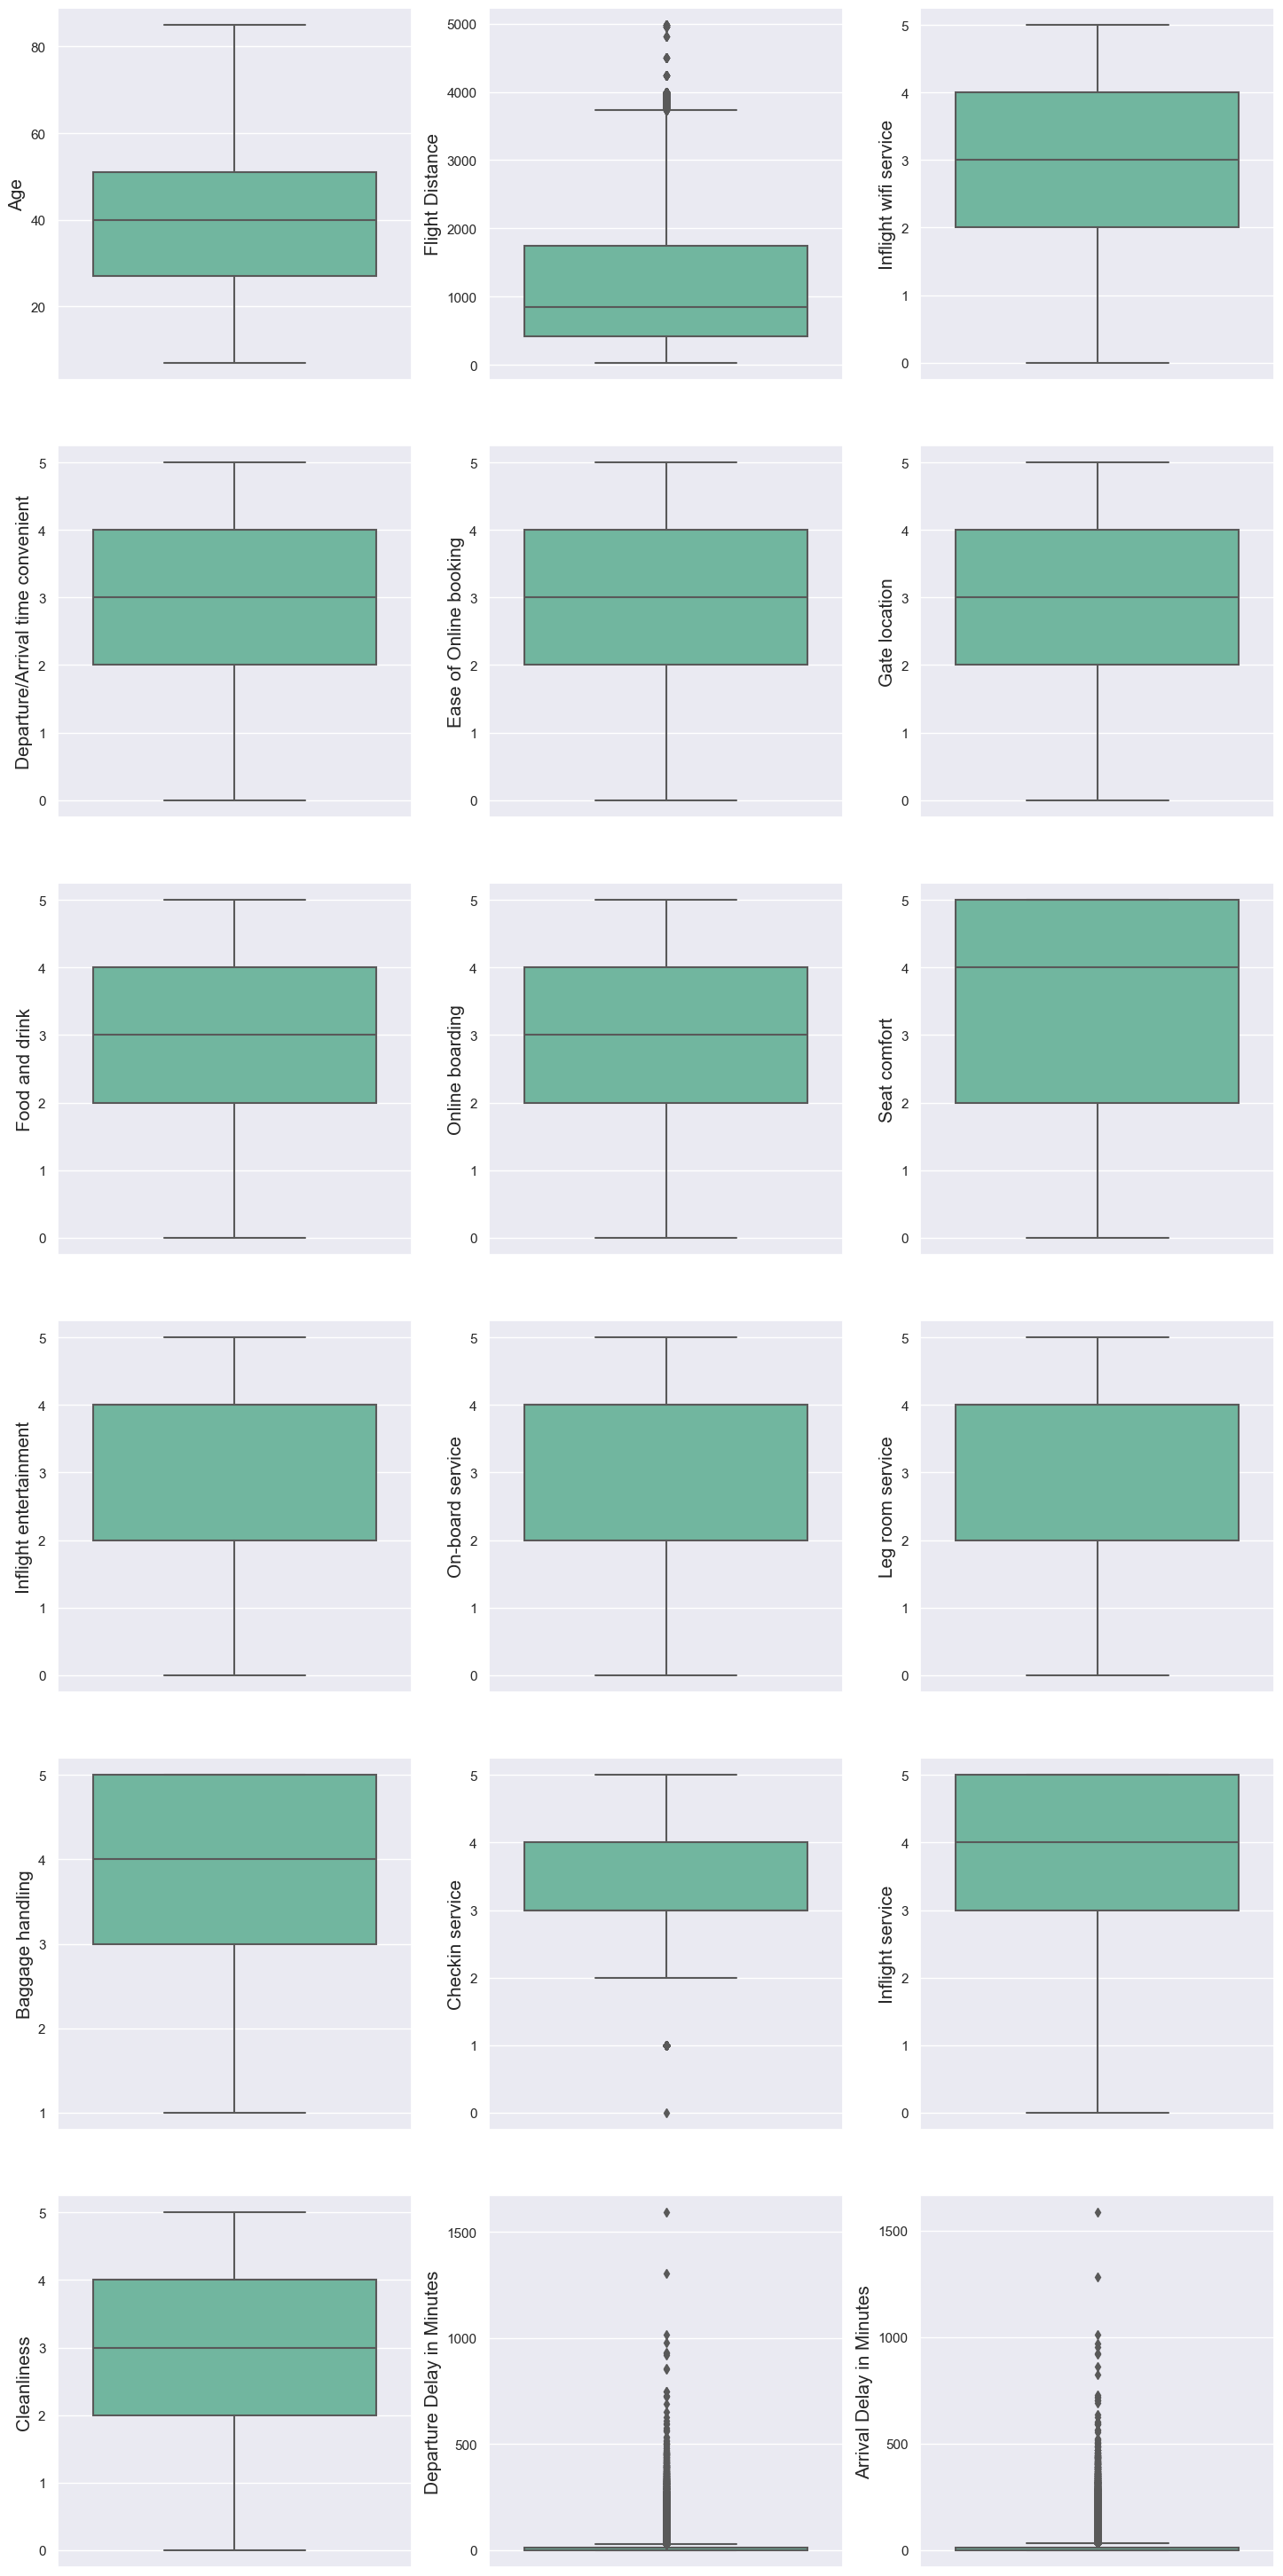

In [61]:
sns.set(rc={
            "font.size":10,
            "axes.titlesize":10,
            "axes.labelsize":15},
             style="darkgrid",
            )
fig, axs = plt.subplots(6, 3, figsize=(15, 30))
fig.tight_layout(pad=3.0)

for f, ax in zip(numerical_cols, axs.ravel()):
    sns.set(font_scale=2)
    ax= sns.boxplot(ax=ax, data=train_df, y=train_df[f], palette='BuGn')

**Observations:**

Flight distance, checkin service, Departure Delay in minutes, Arrival delay in minutes has some outliers

### Barplot representation of numerical features

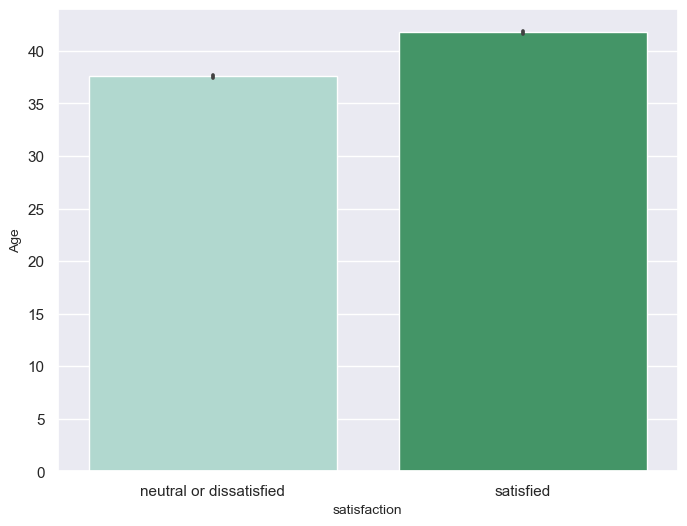

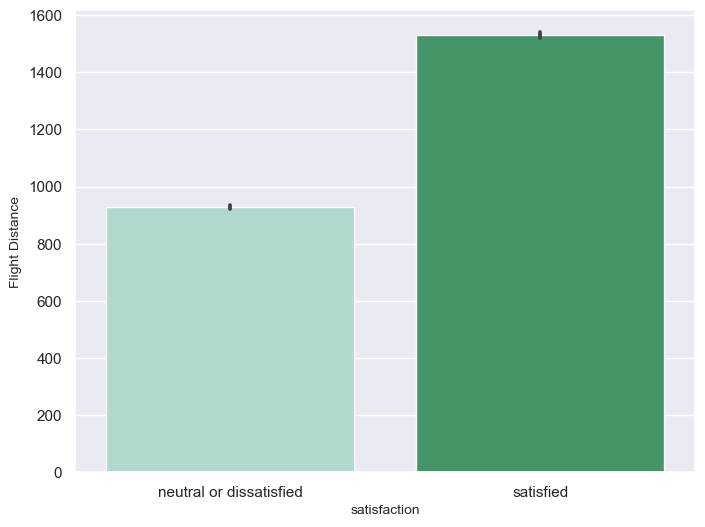

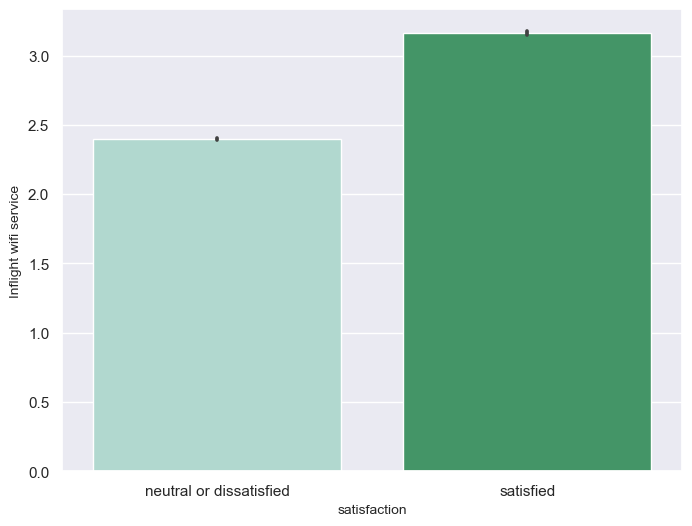

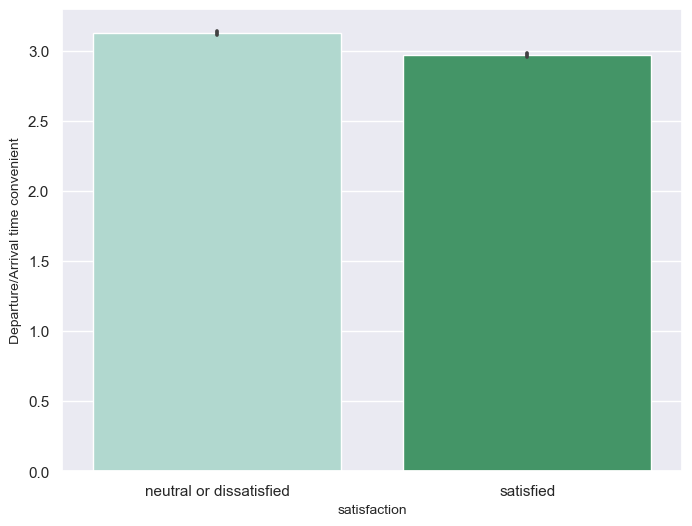

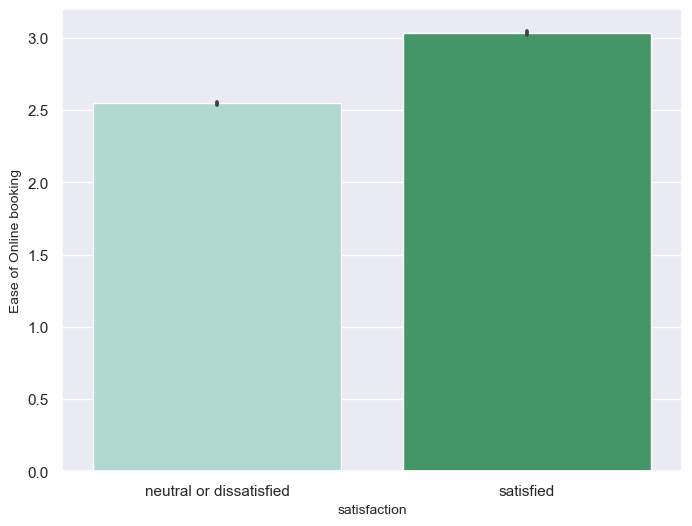

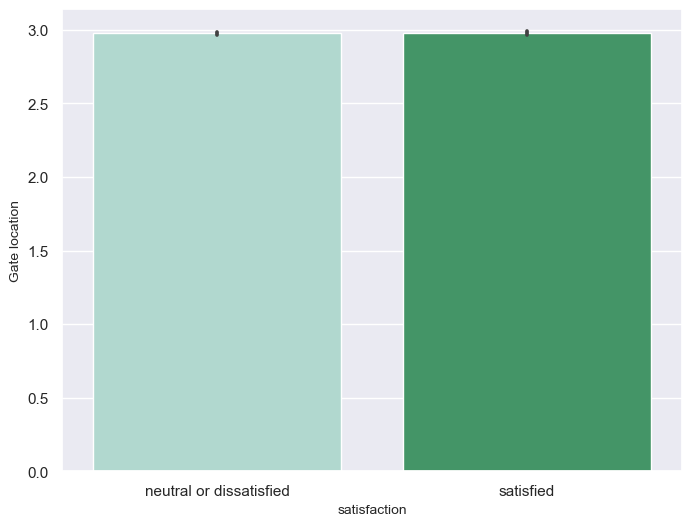

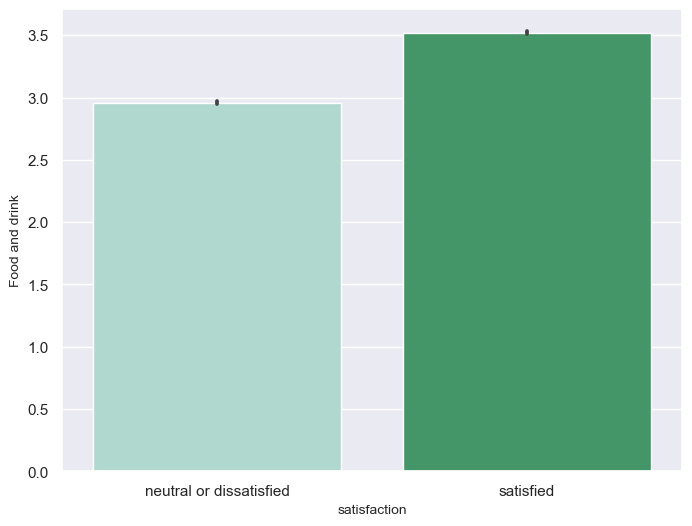

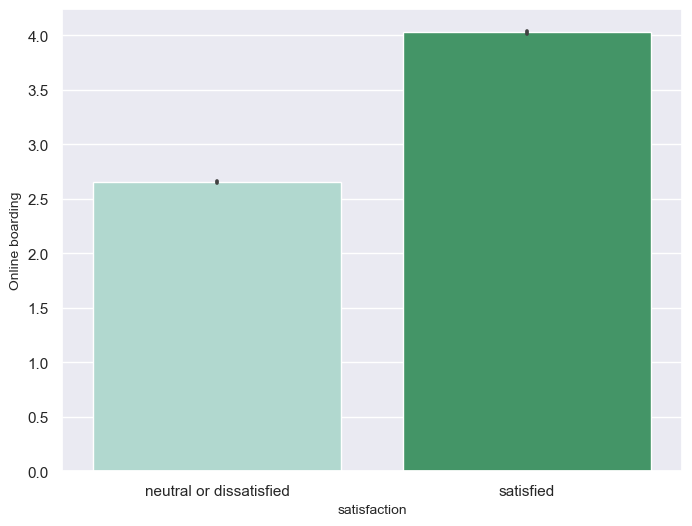

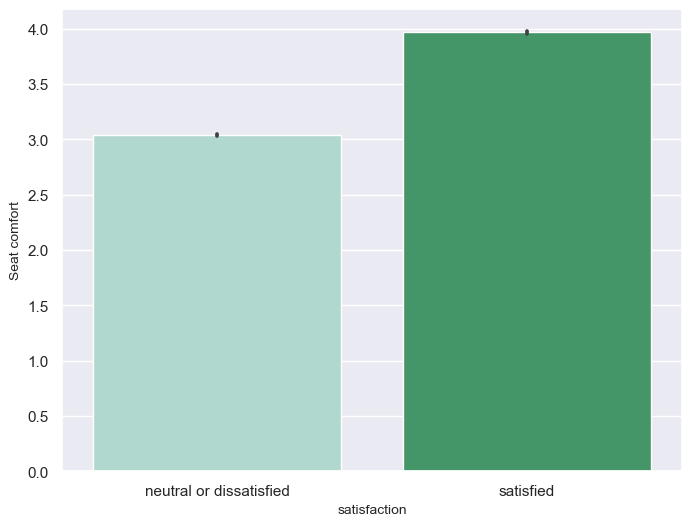

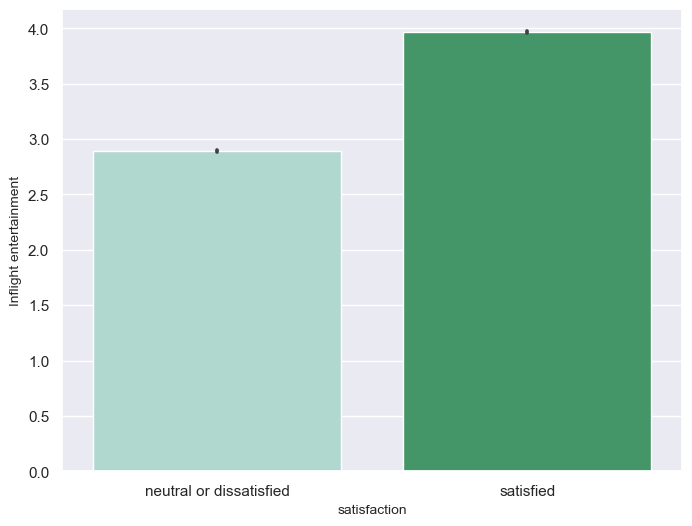

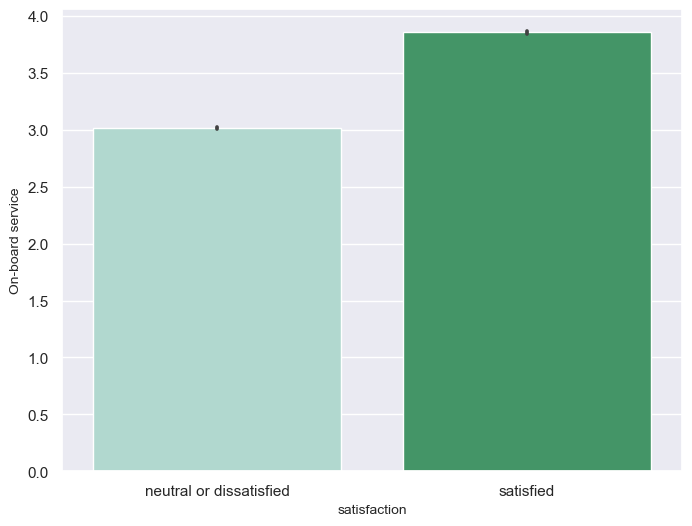

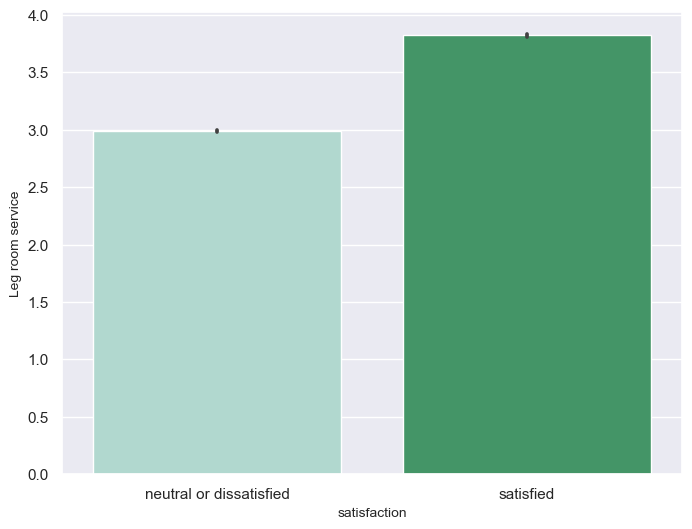

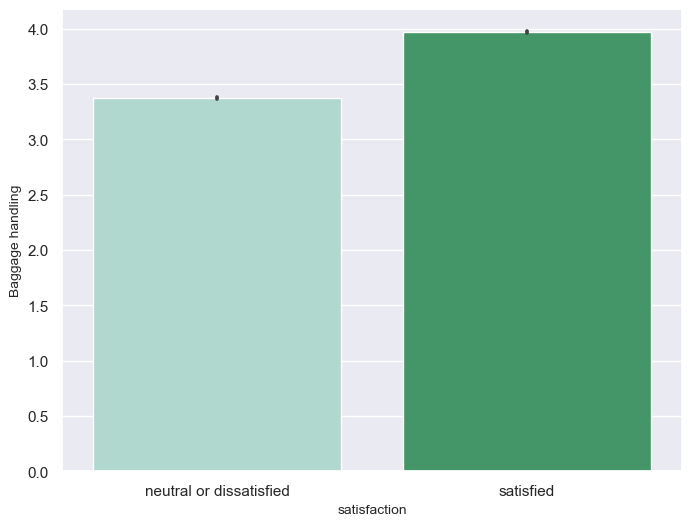

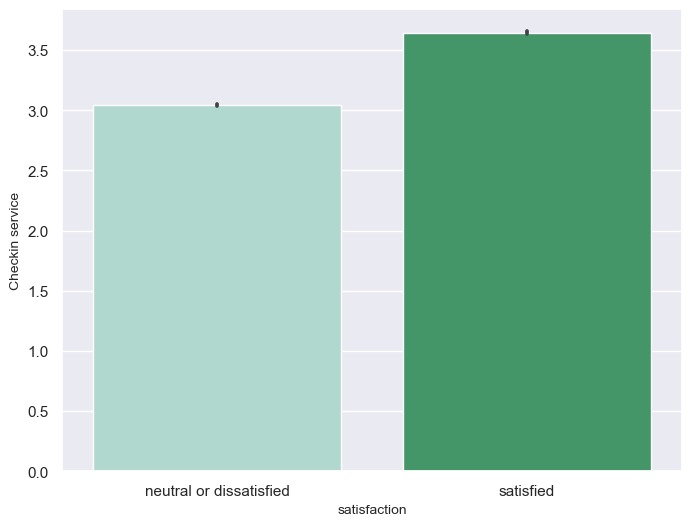

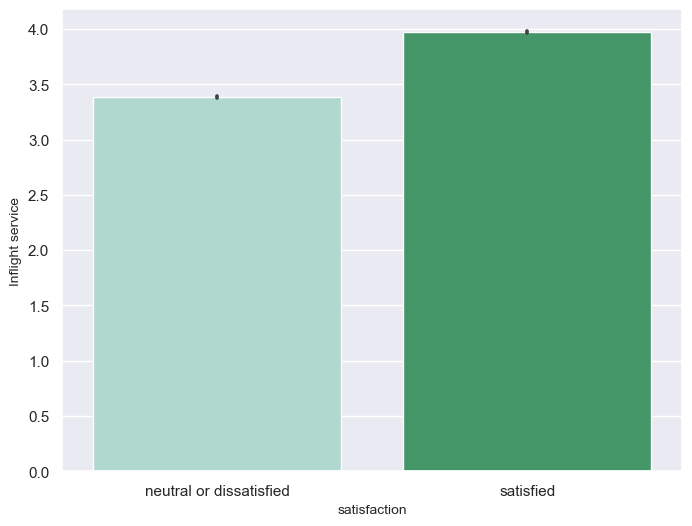

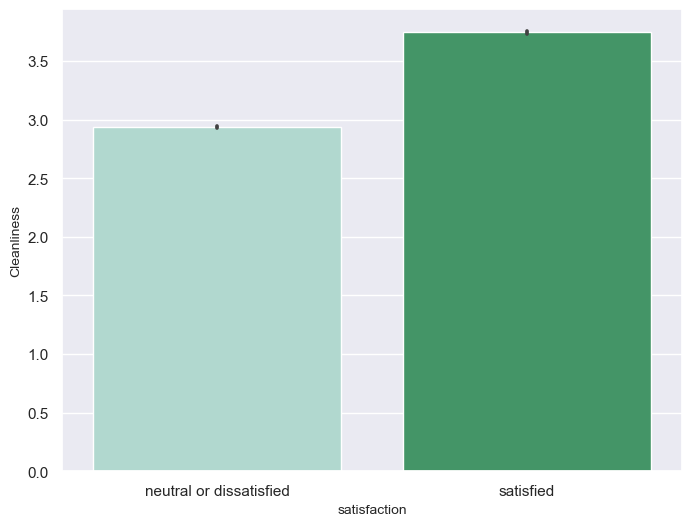

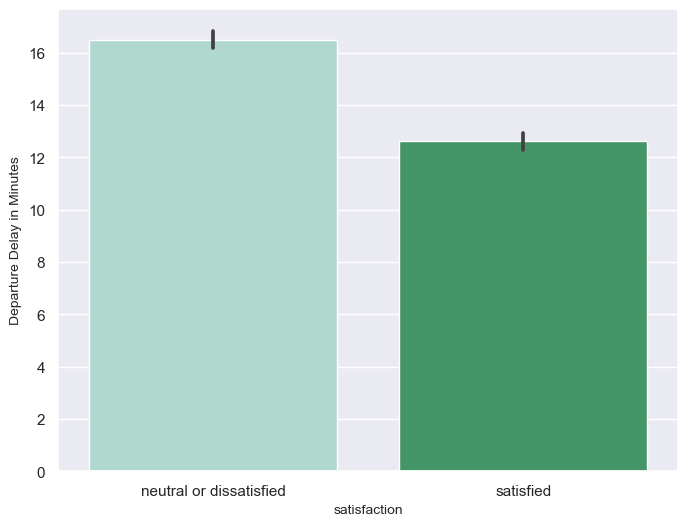

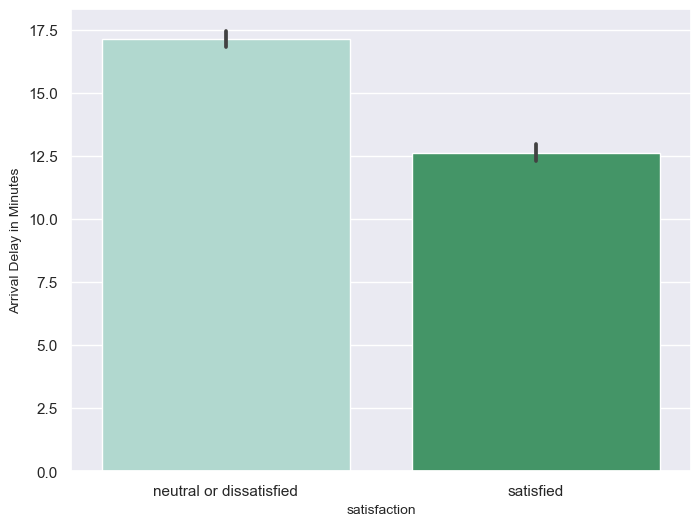

In [34]:
sns.set(rc={'figure.figsize':(8,6),
            "font.size":10,
            "axes.titlesize":10,
            "axes.labelsize":15},
             style="darkgrid")

for col in numerical_cols:
    sns.barplot(data=train_df, x="satisfaction", y=col, palette='BuGn')
    plt.show()

**Observations:**

- From above graphs,it is clear that the age and Gate location, does not play a huge role in flight satisfaction.
- And also the gender does not tell us mush as seen in the earlier plot. hence we can rop these values 

# Exploratory Data Analysis and Visualization on Categorical Column

### Barplot representaion on Categoricol Column

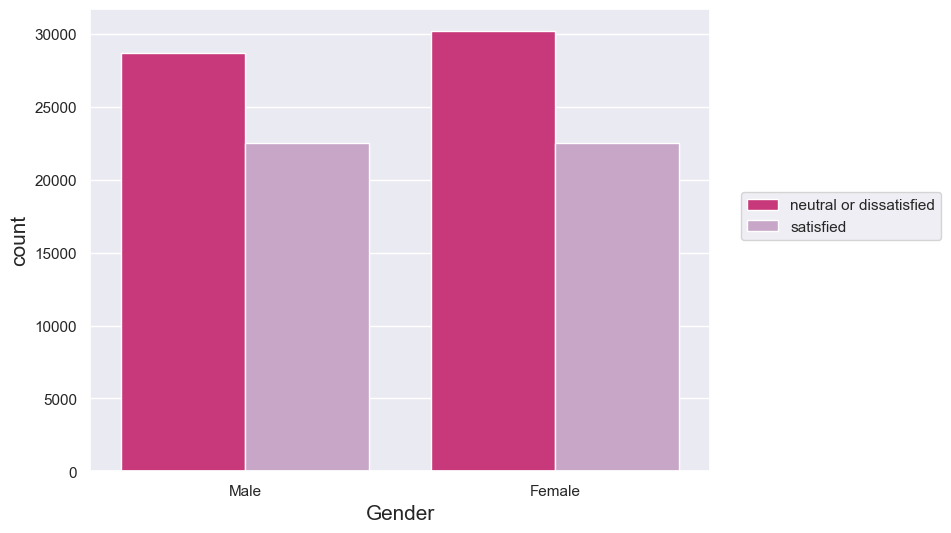

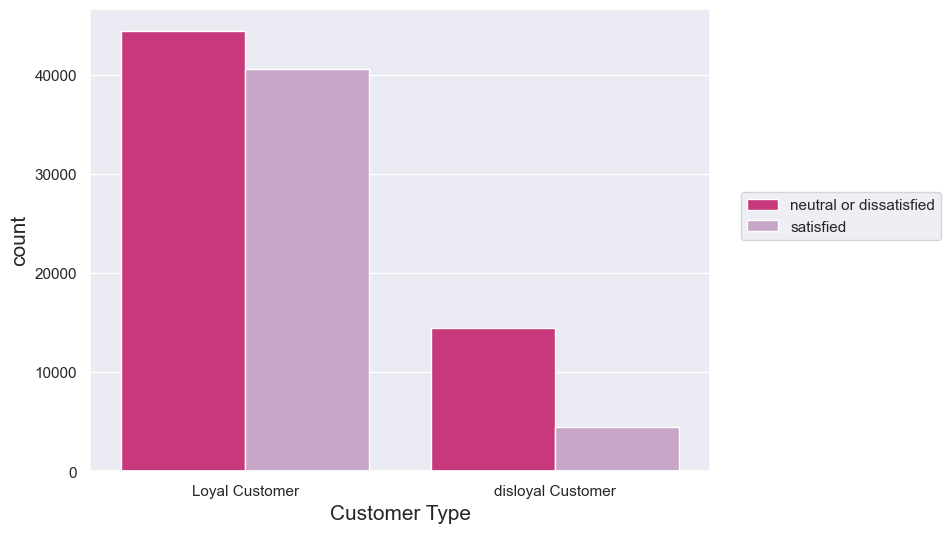

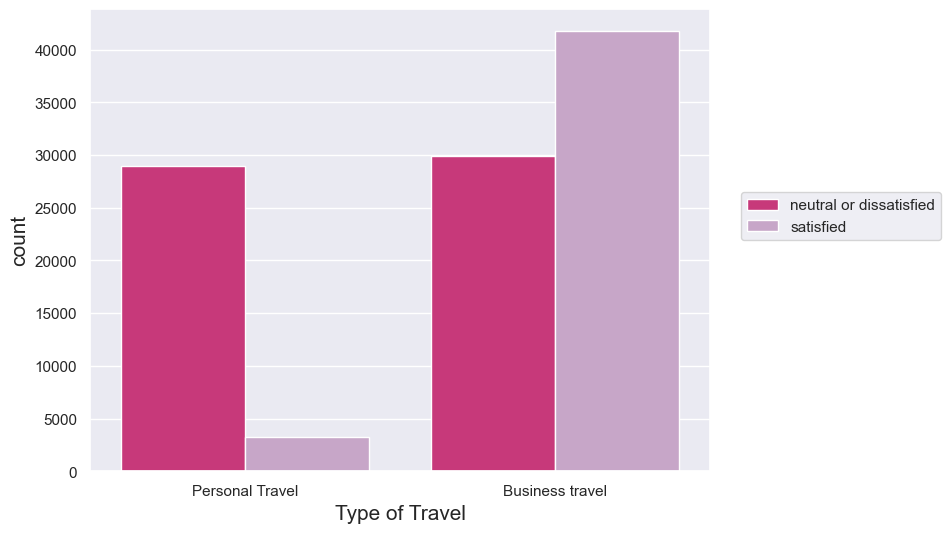

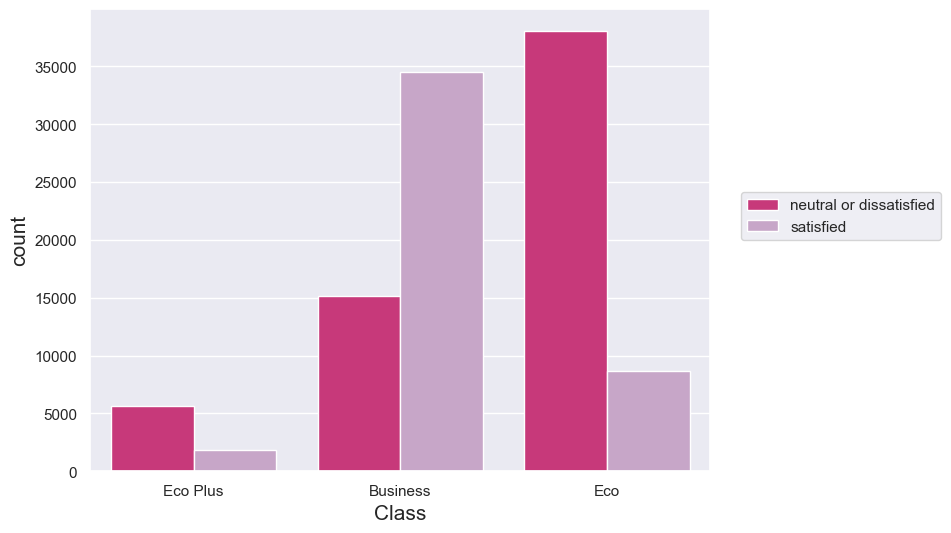

In [62]:
sns.set(rc={'figure.figsize':(11.7,8.27),
            "font.size":10,
            "axes.titlesize":10,
            "axes.labelsize":15},
             style="darkgrid",
            )
for col in categorical_cols:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=train_df,x=col, hue='satisfaction', palette='PuRd_r')
    plt.legend(loc=(1.05,0.5))
    

**Observations:**

- Gender doesn't play an important role in the satisfaction, as men and women seems to equally concerned about the same factors
- Number of loyal customers for this airline is high, however, the dissatisfaction level is high irrespective of the loyalty. Airline will have to work on maintaining the loyal customers
- Business Travellers seems to be more satisfied with the flight, than the personal travellers
- People in business class seems to be the most satisfied lot, and those in economy class are least satisfied

## Arrival Delay in Minutes VS Departure Delay in minutes.

In [63]:
train_df.groupby('satisfaction')['Arrival Delay in Minutes'].mean()

satisfaction
neutral or dissatisfied    17.127536
satisfied                  12.630799
Name: Arrival Delay in Minutes, dtype: float64

<Axes: xlabel='Arrival Delay in Minutes', ylabel='Departure Delay in Minutes'>

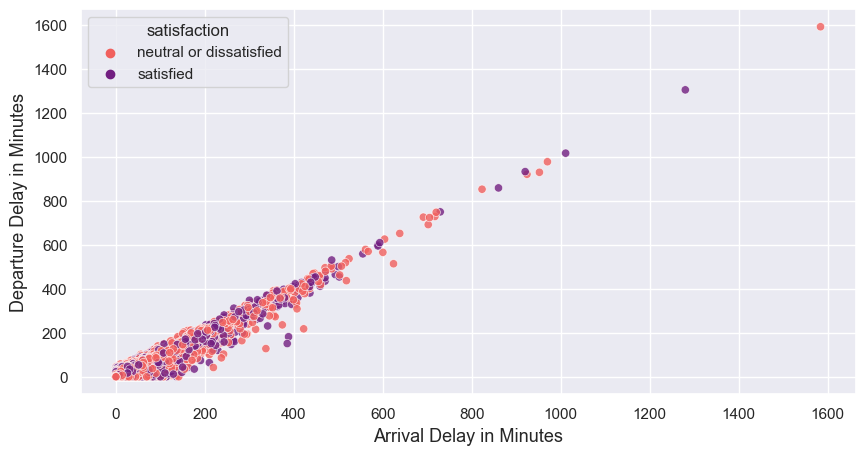

In [64]:
sns.set(rc={
            "font.size":10,
            "axes.titlesize":10,
            "axes.labelsize":13},
             style="darkgrid")
plt.figure(figsize=(10, 5), dpi=100)
sns.scatterplot(data=train_df, x="Arrival Delay in Minutes", y= "Departure Delay in Minutes", hue='satisfaction', palette="magma_r",alpha=0.8)

**Observations:**

The arrival and departure delay seems to have a linear relationship, which makes complete sense! And well, there is 1 customer who was satisfied even after a delay of 1300 minutes!!

## Flight distance vs Departure Delay in Minutes

(0.0, 1000.0)

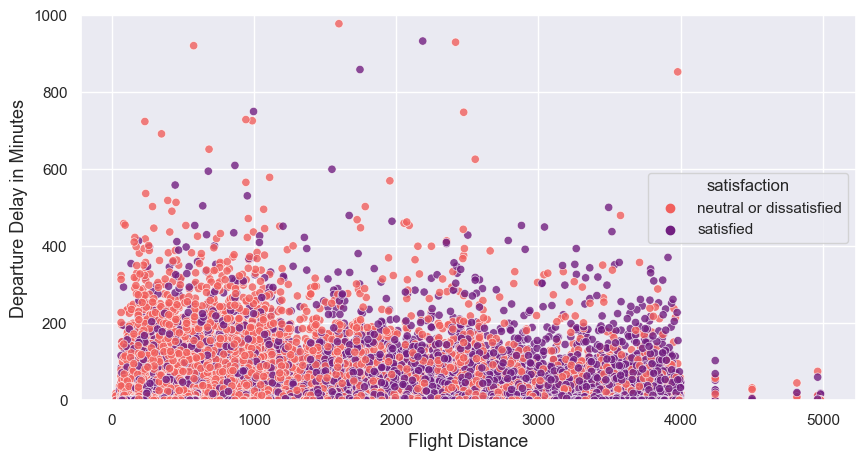

In [65]:
sns.set(rc={
            "font.size":10,
            "axes.titlesize":10,
            "axes.labelsize":13},
             style="darkgrid")
plt.figure(figsize=(10, 5), dpi=100)
sns.scatterplot(data=train_df, x="Flight Distance", y= "Departure Delay in Minutes", hue='satisfaction', palette="magma_r",alpha=0.8)
plt.ylim(0,1000)

**Observations:**
- The most important takeaway here is the longer the flight distance, most passengers are okay with flight delay in departure, which is strance finding from this plot!
- So departure delay is less of a factor for a long distance flight, comparitively, however, short distance travellers does not seem to be excited about the departure delays, which also makes sense

## Age and Customer type

<Axes: xlabel='Age', ylabel='Count'>

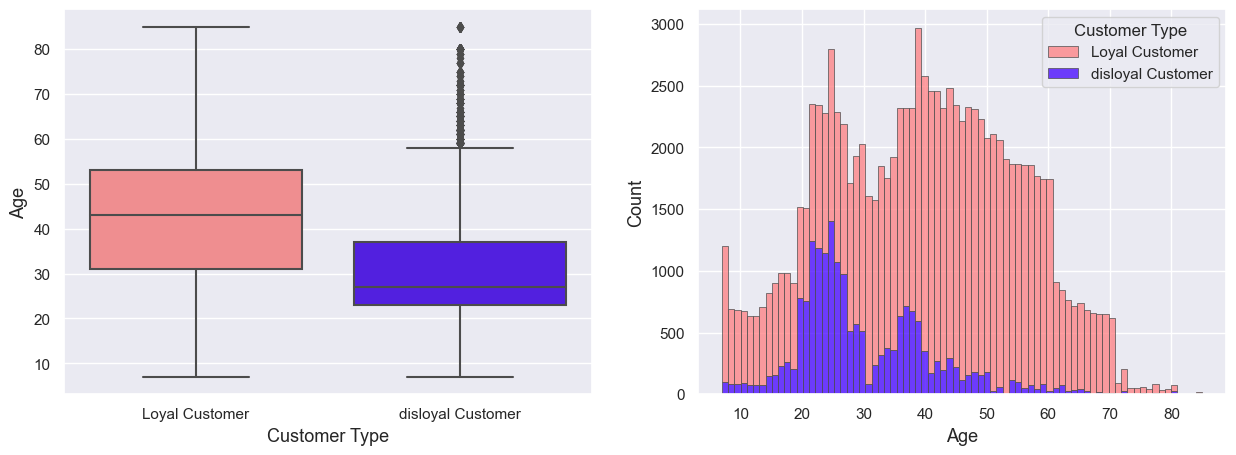

In [66]:
f, ax = plt.subplots(1,2, figsize=(15, 5))
sns.boxplot(data=train_df, x="Customer Type", y= "Age",palette = "gnuplot2_r", ax=ax[0])
sns.histplot(data=train_df, x="Age", hue="Customer Type", multiple="stack", palette = "gnuplot2_r",edgecolor = ".3", linewidth = .5, ax = ax[1])

**Observations:**
- From above we can conclude that most of the airline's regular customers are between the ages of 30 and 50(their average age is slightly above 40)
- The age range of non-regular customers is slightly smaller (from 25 to 40 years old, on average - a little less than 30).

## Age vs Class

<Axes: xlabel='Age', ylabel='Count'>

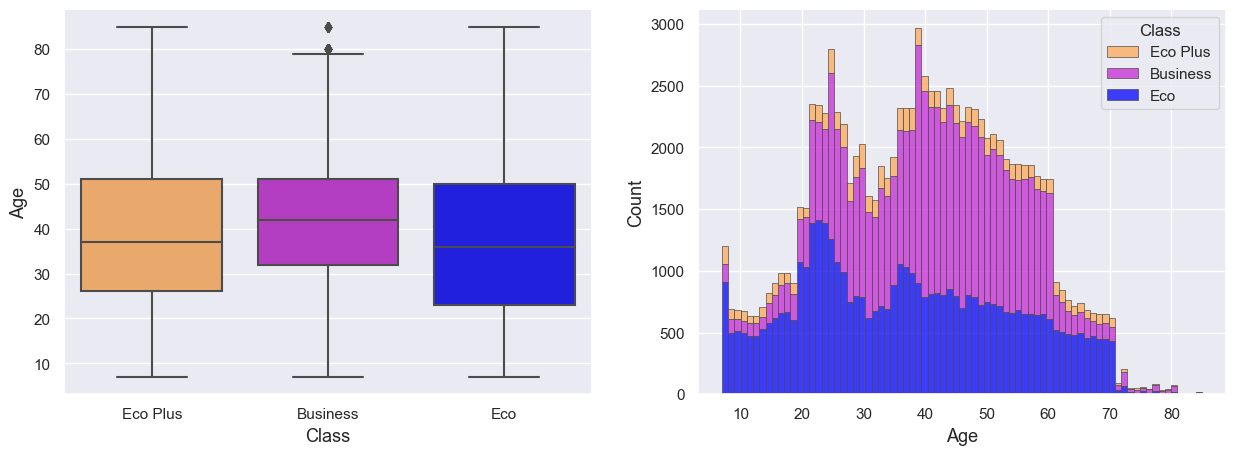

In [67]:
f, ax  =plt.subplots(1,2,figsize=(15,5))
sns.boxplot(data=train_df, x="Class", y="Age",palette = "gnuplot2_r", ax=ax[0])
sns.histplot(data=train_df, x="Age", hue="Class", multiple="stack", palette="gnuplot2_r",edgecolor = ".3", linewidth = .5, ax = ax[1])

- It can be seen that, on average, the age range of those customers who travel in business class is the same (according to the previous box chart) as the age range of regular customers. Based on this observation, it can be assumed that regular customers mainly buy business class for themselves.

<Axes: xlabel='Flight Distance', ylabel='Count'>

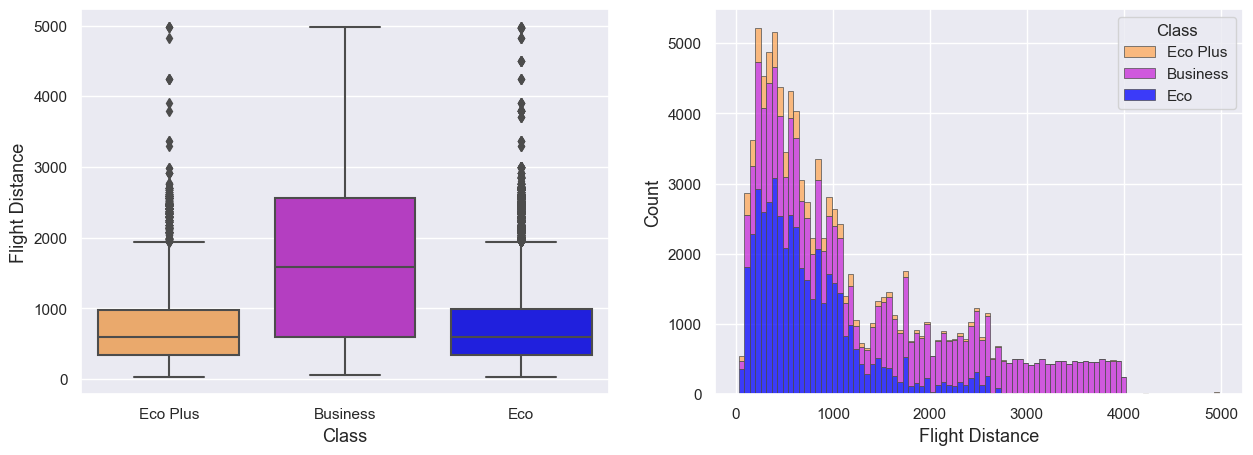

In [68]:
f, ax = plt.subplots(1, 2, figsize = (15,5))
sns.boxplot(x = "Class", y = "Flight Distance", palette = "gnuplot2_r", data = train_df, ax = ax[0])
sns.histplot(train_df, x = "Flight Distance", hue = "Class", multiple = "stack", palette = "gnuplot2_r", edgecolor = ".3", linewidth = .5, ax = ax[1])

**Observations:**

- customers whose flight distance is long, mostly fly in business class.

## Flight Distance

<Axes: xlabel='Flight Distance', ylabel='Count'>

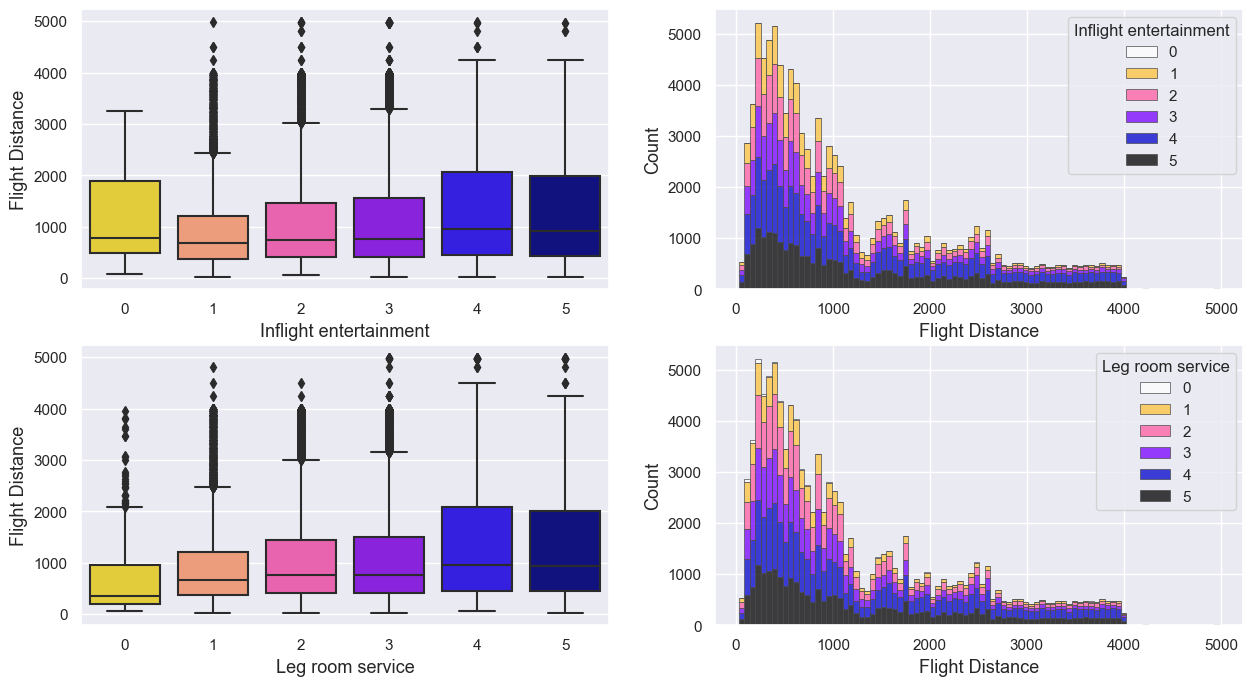

In [69]:
f,ax = plt.subplots(2,2, figsize=(15, 8))
sns.boxplot(x = "Inflight entertainment", y = "Flight Distance", palette = "gnuplot2_r", data = train_df, ax = ax[0, 0])
sns.histplot(train_df, x = "Flight Distance", hue = "Inflight entertainment", multiple = "stack", palette = "gnuplot2_r", edgecolor = ".3", linewidth = .5, ax = ax[0, 1])
sns.boxplot(x = "Leg room service", y = "Flight Distance", palette = "gnuplot2_r", data = train_df, ax = ax[1, 0])
sns.histplot(train_df, x = "Flight Distance", hue = "Leg room service", multiple = "stack", palette = "gnuplot2_r", edgecolor = ".3", linewidth = .5, ax = ax[1, 1])

**Observations:**

- The more distance an aircraft passenger travels (respectively, the longer they are in flight)
- The more they are satisfied with the entertainment in flight and the extra legroom (on average).

# Data preprocessing and Feature engineering

In [70]:
input_cols = list(train_df.iloc[:, :-1])
target_cols = "satisfaction"

In [71]:
pd.options.display.max_columns=30

In [72]:
train_df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


In [73]:
train_df["Gender"] = pd.get_dummies(train_df["Gender"], drop_first=True, dtype="int")

In [74]:
train_df["Customer Type"]= pd.get_dummies(train_df["Customer Type"], drop_first=True, dtype="int")

In [75]:
train_df["Type of Travel"]= pd.get_dummies(train_df["Type of Travel"], drop_first=True, dtype="int")

In [76]:
from sklearn.preprocessing import LabelEncoder

In [77]:
le = LabelEncoder()

In [78]:
train_df["Class"]=le.fit_transform(train_df["Class"])

In [79]:
train_df["Class"]

0         2
1         0
2         0
3         0
4         0
         ..
103899    1
103900    0
103901    0
103902    1
103903    0
Name: Class, Length: 103904, dtype: int32

In [80]:
train_df["Arrival Delay in Minutes"]

0         18.0
1          6.0
2          0.0
3          9.0
4          0.0
          ... 
103899     0.0
103900     0.0
103901    14.0
103902     0.0
103903     0.0
Name: Arrival Delay in Minutes, Length: 103904, dtype: float64

In [81]:
from sklearn.impute import SimpleImputer

In [82]:
median=train_df["Arrival Delay in Minutes"].median()

In [83]:
train_df["Arrival Delay in Minutes"].fillna(median, inplace=True)

In [84]:
train_df.isnull().sum()

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

In [85]:
train_df

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,1,0,13,1,2,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,1,25,0,0,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,0,0,26,0,0,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,0,0,25,0,0,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,1,0,61,0,0,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,0,1,23,0,1,192,2,1,2,3,2,2,2,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,1,0,49,0,0,2347,4,4,4,4,2,4,5,5,5,5,5,5,5,4,0,0.0,satisfied
103901,1,1,30,0,0,1995,1,1,1,3,4,1,5,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,0,1,22,0,1,1000,1,1,1,5,1,1,1,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


In [86]:
train_df["satisfaction"] = le.fit_transform(train_df["satisfaction"])

In [87]:
train_df

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,1,0,13,1,2,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,0
1,1,1,25,0,0,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,0
2,0,0,26,0,0,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,1
3,0,0,25,0,0,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,0
4,1,0,61,0,0,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,0,1,23,0,1,192,2,1,2,3,2,2,2,2,3,1,4,2,3,2,3,0.0,0
103900,1,0,49,0,0,2347,4,4,4,4,2,4,5,5,5,5,5,5,5,4,0,0.0,1
103901,1,1,30,0,0,1995,1,1,1,3,4,1,5,4,3,2,4,5,5,4,7,14.0,0
103902,0,1,22,0,1,1000,1,1,1,5,1,1,1,1,4,5,1,5,4,1,0,0.0,0


## Save the processed data

In [109]:
train_df.to_csv(path_or_buf="processed_data/train_df.csv", index=False)

In [146]:
train_df = pd.read_csv('processed_data/train_df.csv')

In [147]:
train_df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,1,0,13,1,2,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,0
1,1,1,25,0,0,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,0
2,0,0,26,0,0,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,1
3,0,0,25,0,0,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,0
4,1,0,61,0,0,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,1


## Splitting the data

In [148]:
from sklearn.model_selection import train_test_split

In [149]:
train_val_df, test_df = train_test_split(train_df, test_size=0.2, random_state=42)

In [150]:
train_df, val_df = train_test_split(train_val_df, test_size=0.25, random_state=42)

In [151]:
print(train_df.shape)
print(val_df.shape)
print(test_df.shape)

(62342, 23)
(20781, 23)
(20781, 23)


In [152]:
# train_df['satisfaction'] = train_df['satisfaction'].map({'neutral or dissatisfied':0 , 'satisfied':1})
# val_df['satisfaction'] = val_df['satisfaction'].map({'neutral or dissatisfied':0 , 'satisfied':1})
# test_df['satisfaction'] = test_df['satisfaction'].map({'neutral or dissatisfied':0 , 'satisfied':1})

In [153]:
train_df

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
83488,0,0,51,1,0,366,2,1,2,3,3,3,3,4,4,2,1,4,4,4,0,0.0,0
31648,0,0,38,1,1,109,4,3,4,4,5,4,5,5,1,1,4,5,1,5,0,2.0,1
22340,1,0,50,1,1,78,3,5,3,3,5,3,4,5,3,1,3,3,4,5,0,0.0,0
68992,0,0,43,0,0,1770,5,5,5,5,5,5,4,4,4,4,4,4,4,3,17,8.0,1
100108,1,0,19,1,1,762,3,5,3,3,2,3,4,2,4,3,5,4,5,2,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44593,1,0,54,0,2,989,4,3,3,3,4,4,4,4,4,5,4,3,4,4,25,17.0,0
59278,1,0,60,0,0,3358,0,4,0,2,2,5,4,5,5,5,5,3,5,5,0,0.0,1
29978,1,0,58,1,2,787,3,4,3,2,4,3,3,4,3,5,5,5,4,4,0,0.0,0
92224,0,0,57,1,1,431,0,5,0,2,2,5,5,5,5,0,5,3,5,5,0,0.0,1


## Scaling the Numeric features

In [154]:
from sklearn.preprocessing import MinMaxScaler

In [155]:
scaler = MinMaxScaler()

In [156]:
# select the columns to be used for training/prediction

# training dataset
X_train_ = train_df.drop("satisfaction", axis=1)
X_train = scaler.fit_transform(X_train_) ##scaled
y_train = train_df.satisfaction

In [157]:
X_val_ = val_df.drop("satisfaction", axis=1)
X_val = scaler.transform(X_val_) ##scaled
y_val = val_df.satisfaction

In [158]:
X_test_ = test_df.drop("satisfaction", axis=1)
X_test = scaler.transform(X_test_) ##scaled
y_test = test_df.satisfaction

# Model Training Experiments

## Data Modelling

### Helper Functions

In [159]:
def plot_roc_curve(y_true,y_prob_preds,ax):
    """
    To plot the ROC curve for the given predictions and model

    """ 
    fpr,tpr,threshold = roc_curve(y_true,y_prob_preds)
    roc_auc = auc(fpr,tpr)
    ax.plot(fpr,tpr,"b",label="AUC = %0.2f" % roc_auc)
    ax.set_title("Receiver Operating Characteristic")
    ax.legend(loc='lower right')
    ax.plot([0,1],[0,1],'r--')
    ax.set_xlim([0,1])
    ax.set_ylim([0,1])
    ax.set_xlabel("False Positive Rate")
    ax.set_ylabel("True Positive Rate");
    plt.show();

In [160]:
def plot_confustion_matrix(y_true,y_preds,axes,name=''):
    """
    To plot the Confusion Matrix for the given predictions

    """     
    cm = confusion_matrix(y_true, y_preds)
    group_names = ['TN','FP','FN','TP']
    group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
    group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cm, annot=labels, fmt='', cmap='Blues',ax=axes)
    axes.set_ylim([2,0])
    axes.set_xlabel('Prediction')
    axes.set_ylabel('Actual')
    axes.set_title(f'{name} Confusion Matrix');

In [162]:
def make_classification_report(model,inputs,targets,model_name=None,record=False):
    """
     To Generate the classification report with all the metrics of a given model with confusion matrix as well as ROC AUC curve.

    """
    ### Getting the model name from model object
    if model_name is None: 
        model_name = str(type(model)).split(".")[-1][0:-2]

    ### Making the predictions for the given model
    preds = model.predict(inputs)
    if model_name in ["LinearSVC"]:
        prob_preds = model.decision_function(inputs)
    else:
        prob_preds = model.predict_proba(inputs)[:,1]

    ### printing the ROC AUC score
    auc_score = roc_auc_score(targets,prob_preds)
    print("ROC AUC Score : {:.2f}%\n".format(auc_score * 100.0))
    

    ### Plotting the Confusion Matrix and ROC AUC Curve
    fig, axes = plt.subplots(1, 2, figsize=(18,6))
    plot_confustion_matrix(targets,preds,axes[0],model_name)
    plot_roc_curve(targets,prob_preds,axes[1])
   

## Non Tree Models

## Logistic Rregression

<p>This type of statistical model (also known as logit model) is often used for classification and predictive analytics. Logistic regression estimates the probability of an event occurring, such as voted or didn’t vote, based on a given dataset of independent variables. Since the outcome is a probability, the dependent variable is bounded between 0 and 1.</p> 
<p>In logistic regression, a logit transformation is applied on the odds—that is, the probability of success divided by the probability of failure. This is also commonly known as the log odds, or the natural logarithm of odds, and this logistic function is represented by the following formulas:<p>

Logit(pi) = 1/(1+ exp(-pi))

ln(pi/(1-pi)) = Beta_0 + Beta_1*X_1 + … + B_k*K_k 

![](https://media5.datahacker.rs/2021/01/44-1536x707.jpg) 

<p>In this logistic regression equation, logit(pi) is the dependent or response variable and x is the independent variable. The beta parameter, or coefficient, in this model is commonly estimated via maximum likelihood estimation (MLE). This method tests different values of beta through multiple iterations to optimize for the best fit of log odds. All of these iterations produce the log likelihood function, and logistic regression seeks to maximize this function to find the best parameter estimate. Once the optimal coefficient (or coefficients if there is more than one independent variable) is found, the conditional probabilities for each observation can be calculated, logged, and summed together to yield a predicted probability.</p> 
<p>For binary classification, a probability less than .5 will predict 0 while a probability greater than 0 will predict 1.  After the model has been computed, it’s best practice to evaluate the how well the model predicts the dependent variable, which is called goodness of fit.</p>

[source](https://www.ibm.com/topics/logistic-regression) 


![](https://media5.datahacker.rs/2021/01/83-1536x868.jpg) 

		LOGISTICREGRESSION MODEL

Training part:
                            precision    recall  f1-score   support

neutral or dissatisfaction       0.88      0.90      0.89     35308
              satisfaction       0.87      0.83      0.85     27034

                  accuracy                           0.87     62342
                 macro avg       0.87      0.87      0.87     62342
              weighted avg       0.87      0.87      0.87     62342

validation part:
                            precision    recall  f1-score   support

neutral or dissatisfaction       0.57      0.58      0.58     11858
              satisfaction       0.43      0.42      0.43      8923

                  accuracy                           0.51     20781
                 macro avg       0.50      0.50      0.50     20781
              weighted avg       0.51      0.51      0.51     20781

Accuracy score for traing dataset 0.874161881235764
Accuracy score for validation dataset 0.5129685770655887
ROC AUC S

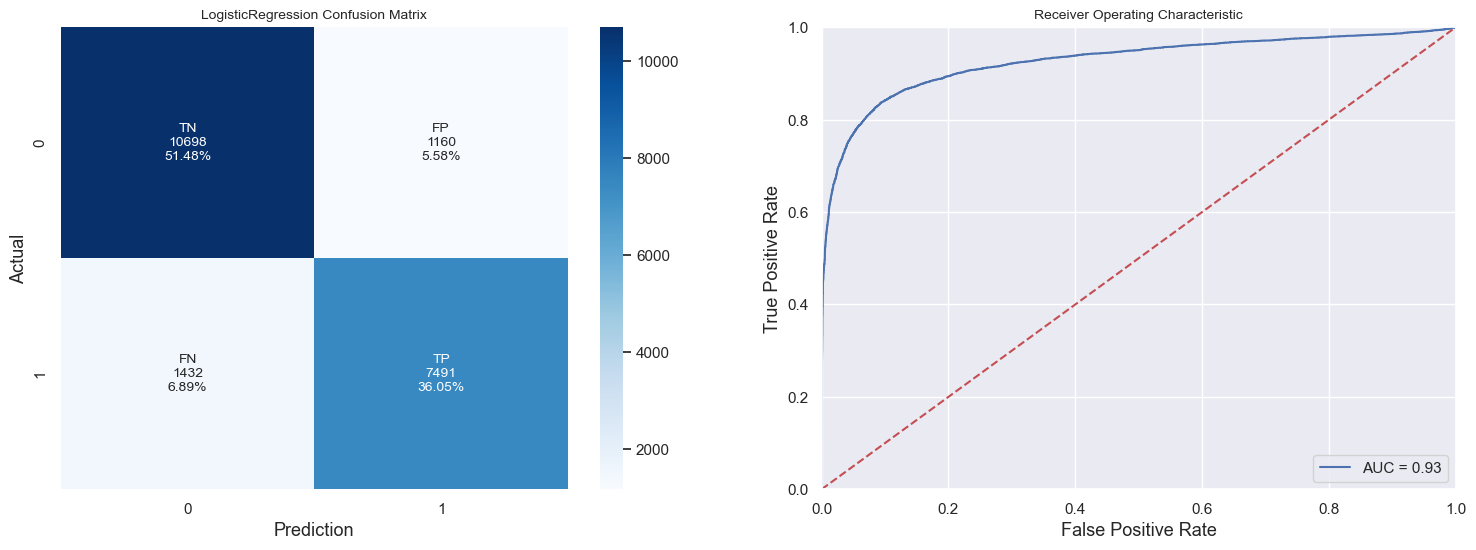

In [164]:
# Import the model
from sklearn.linear_model import LogisticRegression

#fit the model
model = LogisticRegression()
model.fit(X_train,y_train)

# prediction
pred_train = model.predict(X_train)
pred_val = model.predict(X_test)


# model name
model_name = str(type(model)).split(".")[-1][0:-2]
print(f"\t\t{model_name.upper()} MODEL\n")

print('Training part:')
print(classification_report(y_train, pred_train,
                                    target_names=['neutral or dissatisfaction', 'satisfaction']))
print('validation part:')
print(classification_report(y_val, pred_val,
                                    target_names=['neutral or dissatisfaction', 'satisfaction']))
print("Accuracy score for traing dataset",accuracy_score(y_train, pred_train))
print("Accuracy score for validation dataset",accuracy_score(y_val, pred_val))

make_classification_report(model,X_val,y_val)

In [119]:
from sklearn.naive_bayes import GaussianNB

In [120]:
pipe2 = make_pipeline(MinMaxScaler(), GaussianNB())

In [121]:
pipe2.fit(X_train, y_train)

Pipeline(steps=[('minmaxscaler', MinMaxScaler()), ('gaussiannb', GaussianNB())])

In [122]:
y_pred = pipe2.predict(X_test)

In [130]:
y_pred_val = pipe2.predict(X_val)

In [123]:
roc_auc_score(y_test, y_pred)

0.8610807974249297

In [133]:
print(classification_report(y_test, y_pred))
print("classification report for validation dataset \n")
print(classification_report(y_val, y_pred_val))

              precision    recall  f1-score   support

           0       0.87      0.90      0.88     11713
           1       0.86      0.82      0.84      9068

    accuracy                           0.87     20781
   macro avg       0.87      0.86      0.86     20781
weighted avg       0.87      0.87      0.87     20781

classification report for validation dataset 

              precision    recall  f1-score   support

           0       0.87      0.90      0.88     11858
           1       0.86      0.82      0.84      8923

    accuracy                           0.86     20781
   macro avg       0.86      0.86      0.86     20781
weighted avg       0.86      0.86      0.86     20781



In [ ]:
########################## Linear SVC ###########################

In [134]:
from sklearn.svm import LinearSVC

In [135]:
pipe3 = make_pipeline(MinMaxScaler(), LinearSVC())

In [136]:
pipe3.fit(X_train, y_train)

Pipeline(steps=[('minmaxscaler', MinMaxScaler()), ('linearsvc', LinearSVC())])

In [137]:
y_pred = pipe3.predict(X_test)

In [140]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.91      0.89     11713
           1       0.88      0.84      0.86      9068

    accuracy                           0.88     20781
   macro avg       0.88      0.87      0.87     20781
weighted avg       0.88      0.88      0.88     20781



In [141]:
roc_auc_score(y_test, y_pred)

0.873198858630793

In [ ]:
###################### KNN Classifier ###################

In [142]:
from sklearn.neighbors import KNeighborsClassifier

In [143]:
pipe4 = make_pipeline(MinMaxScaler(), KNeighborsClassifier())

In [144]:
pipe4.fit(X_train, y_train)

Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [146]:
y_pred = pipe4.predict(X_test)

In [147]:
roc_auc_score(y_test, y_pred)

0.9209007351646613

In [149]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94     11713
           1       0.95      0.87      0.91      9068

    accuracy                           0.93     20781
   macro avg       0.93      0.92      0.92     20781
weighted avg       0.93      0.93      0.93     20781



In [150]:
######################## Tree based algos ##################

In [151]:
from sklearn.tree import DecisionTreeClassifier

In [152]:
pipe5 = make_pipeline(MinMaxScaler(), DecisionTreeClassifier())

In [153]:
pipe5.fit(X_train, y_train)

Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('decisiontreeclassifier', DecisionTreeClassifier())])

In [154]:
y_pred = pipe5.predict(X_test)

In [155]:
roc_auc_score(y_test, y_pred)

0.947444017559955

In [157]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95     11713
           1       0.94      0.94      0.94      9068

    accuracy                           0.95     20781
   macro avg       0.95      0.95      0.95     20781
weighted avg       0.95      0.95      0.95     20781



In [158]:
## Random Forest classifier

In [159]:
from sklearn.ensemble import RandomForestClassifier

In [161]:
pipe6 = make_pipeline(MinMaxScaler(),RandomForestClassifier())

In [162]:
pipe6.fit(X_train, y_train)

Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('randomforestclassifier', RandomForestClassifier())])

In [164]:
y_pred = pipe6.predict(X_test)

In [165]:
roc_auc_score(y_test, y_pred)

0.9581745901490247

In [167]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97     11713
           1       0.97      0.94      0.95      9068

    accuracy                           0.96     20781
   macro avg       0.96      0.96      0.96     20781
weighted avg       0.96      0.96      0.96     20781



In [168]:
#################  ADA Boost Classifer #################3

In [169]:
from sklearn.ensemble import AdaBoostClassifier

In [170]:
pipe7 = make_pipeline(MinMaxScaler(),AdaBoostClassifier())

In [171]:
pipe7.fit(X_train, y_train)

Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('adaboostclassifier', AdaBoostClassifier())])

In [174]:
y_pred = pipe7.predict(X_test)

In [175]:
roc_auc_score(y_test, y_pred)

0.9250185597903935

In [176]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.94      0.94     11713
           1       0.92      0.91      0.92      9068

    accuracy                           0.93     20781
   macro avg       0.93      0.93      0.93     20781
weighted avg       0.93      0.93      0.93     20781



In [177]:
############## Gradient Boosting Classifier #############

In [178]:
from sklearn.ensemble import GradientBoostingClassifier

In [179]:
pipe8 = make_pipeline(MinMaxScaler(),GradientBoostingClassifier())

In [180]:
pipe8.fit(X_train, y_train)

Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('gradientboostingclassifier', GradientBoostingClassifier())])

In [181]:
y_pred = pipe8.predict(X_test)

In [182]:
roc_auc_score(y_test, y_pred)

0.9406263003292501

In [183]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95     11713
           1       0.95      0.92      0.93      9068

    accuracy                           0.94     20781
   macro avg       0.94      0.94      0.94     20781
weighted avg       0.94      0.94      0.94     20781



In [184]:
################### XG Boost #######################

In [187]:
from xgboost import XGBClassifier

In [188]:
XGB = XGBClassifier()

In [189]:
XGB.fit(X_train_new, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [190]:
y_pred = XGB.predict(X_test_new)

In [191]:
roc_auc_score(y_test, y_pred)

0.9599248199032808

In [192]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97     11713
           1       0.97      0.94      0.96      9068

    accuracy                           0.96     20781
   macro avg       0.96      0.96      0.96     20781
weighted avg       0.96      0.96      0.96     20781

